## Final Project Submission

Please fill out:
* Student name: Sunwoong Kim
* Student pace: Part time
* Scheduled project review date/time: 9/17/2020
* Instructor name: Lindsey Berlin
* Blog post URL: TBD


# Project Topic: Bank Telemarketing Campagin

Bank XYZ has onboarded 5000 new customers through acquiring a smaller bank. Bank XYZ launches a telemarketing campaign to incite these customers to subscribe to a term deposit. Due to budget and ressource constraints, only 1000 of these new customers can be contacted in this initial stage.

Using data from bank XYZ's customer base and results of the campaign for its existing customers, the goal is to identify which of the 1000 customers to contact to maximise revenue and provide recommendations for future campaigns.

# Project Outline

## Business Understanding

Source from following:<br>
&emsp; Types of Banks: https://www.thestreet.com/personal-finance/education/types-of-banks-14934713 <br>
&emsp; Retail banking business: https://www.investopedia.com/terms/r/retailbanking.asp <br>
&emsp; Bank Deposits:https://www.investopedia.com/terms/b/bank-deposits.asp    

### Banking types:

1) Retail Banks: Retail banks usually provide financial advisement services and can offer personal loans and mortgages.<br>
2) Commercial Banks: Commercial banks service primarily individuals and small businesses and provide small business loans, and offering other financial products.<br>
3) Central Banks: Central banks serve a more governmental role than the other kinds of banks discussed here. They help their country meet the nation's overarching economic goals.<br>
4) Cooperative or Mutual Bank: Cooperative or mutual banks can offer the financial products that both retail and commercial banks provide. The only difference is that they operate on a cooperative basis, meaning that the bank's customers own a portion of the bank.<br>
5) Investment Banks: Investment banks serve as intermediaries and advisers for large corporations, governments, hedge funds, and other financial institutions.<br>
6) Private Banks: Private banks offer a suite of financial products and services, but to a much more specific audience.

### Retail Banking Businesses

A retail bank stores the cash deposits of its retail clients. It then uses these deposits to make loans to other clients. The Federal Reserve requires that all banks keep 10% of their demand and checking deposits inhouse overnight. This is known as the reserve requirement and is seen as a safety and liquidity measure. This means that the remainder of the deposits are allowed to be loaned out. The banks charge interest rates on these loans at a higher rate than they pay on customer deposits, which is how banks earn income.

### Bank Deposits

Bank deposits consist of money placed into banking institutions for safekeeping. These deposits are made to deposit accounts such as savings accounts, checking accounts and money market accounts. The account holder has the right to withdraw deposited funds, as set forth in the terms and conditions governing the account agreement.<br>
The deposit itself is a liability owed by the bank to the depositor. Bank deposits refer to this liability rather than to the actual funds that have been deposited. When someone opens a bank account and makes a cash deposit, he surrenders the legal title to the cash, and it becomes an asset of the bank. In turn, the account is a liability to the bank.

## The Goal: Problem statement

Based on the business understanding of the bank's business, banks are looking for potential customers who could build deposit relationship with the Bank. However resources are scarce. In order to bring out the best result with the given resources, the bank has to find the right target to maximize the effort. Hence, my goal for this project is to find the machine model that can bring the highest accuracy to find the potential customers who can make the deposit to the bank with given condition and status of the candidates. 

### Problem Statement:

Which machine model and attributes brings the highest accuracy to find the potential customers with given condition and status of the candidates?

## Methodology - OSEMN

### OSEMN & Goals for each step
1) Obtain Data - Data obtained from UCI machine learning repository.<br>
2) Scrub Data - Cleaning the data look for outliers and check any missing or unknown values.<br>
3) Explore Data - Inspect and determine which features to use for the model and perform visualization.<br>
4) Model Data - Perform Machine learning and find out which model to adapt.<br>
5) Interpret Data - Simplifying Visualization and results for presentation.<br>

## DATA Obtain - Mining

This processing was provided by the UCI's archive for machine learning. We will take a look at further information about the data. 

Source of Data: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.<br>

   There are two datasets: <br>
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).<br>
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.<br>
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM). <br>

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Data Attribute information:

#### Input variables:
##### Bank client data:
1 - age (numeric)<br>
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")<br>
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)<br>
4 - education (categorical: "unknown","secondary","primary","tertiary")<br>
5 - default: has credit in default? (binary: "yes","no")<br>
6 - balance: average yearly balance, in euros (numeric)<br>
7 - housing: has housing loan? (binary: "yes","no")<br>
8 - loan: has personal loan? (binary: "yes","no")<br>

##### Related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular") <br>
10 - day: last contact day of the month (numeric)<br>
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br>
12 - duration: last contact duration, in seconds (numeric)<br>

##### Other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)<br>
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")<br>

#### Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

## Data Scrubbing

Importing necessary labraries

### Importing Necessary Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, FunctionTransformer

from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, \
                            f1_score, precision_score, recall_score, roc_auc_score,\
                            classification_report

from scikitplot.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, \
                            GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
import time 
from pprint import pprint

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer


import warnings
warnings.filterwarnings('ignore')


In [3]:
full_df = pd.read_csv('bank-full.csv',sep=';')
full_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
full_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Based on the observation of the obove data. The Data will need scaling and separate categorical and non-categorical columns. 

In [5]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are no null values in each column. We will take a deeper look at every and each column and its values since clean data will give us better results.

### Train Test Split

For final test of the model, I will set aside 5000 sample which is about 11 % of the original dataset.

In [6]:
df, test_set = train_test_split(full_df, test_size = 5000, stratify=full_df['y'], random_state = 0)

print(f'Train set Shape: {df.shape}')
print(f'Test set Shape: {test_set.shape}')

Train set Shape: (40211, 17)
Test set Shape: (5000, 17)


### Bank Client Data

#### Column 1: Age - age of candidate (Numeric)

In [7]:
df.age.describe()

count    40211.000000
mean        40.970729
std         10.616850
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

There are too many categories to look for age. Let us visualize it to check the data is distributed.

In [8]:
def bar_graph(df,col,figsize=[10,10]):
    """Draws a bar graph of the column
    df:Data Frame
    col: column in string
    figsize: 1x2 list, default at [10,10]
    """
    plt.figure(figsize=figsize)
    plt.bar(df[col].value_counts().index,df[col].value_counts().values)
    plt.xlabel(col.capitalize())
    plt.ylabel("Population")
    plt.show()

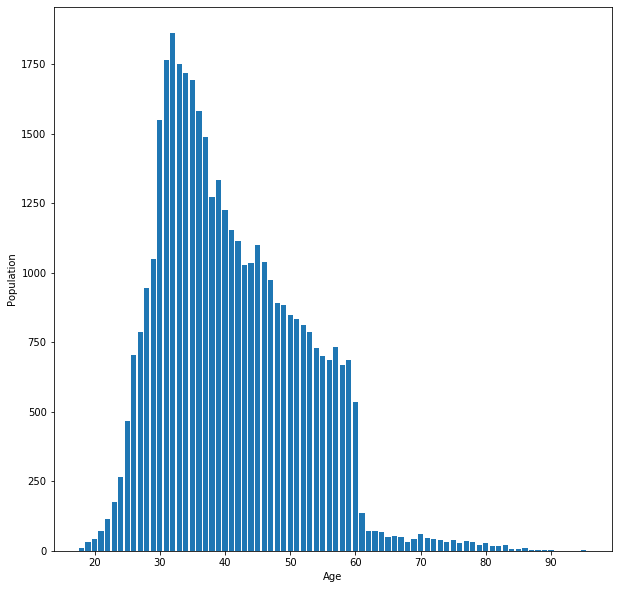

In [9]:
bar_graph(df,'age')

It looks like our data is skewed to the right. We will take a look at the outliers to centralize the data.

In [10]:
def outlier(df_col):
    """df_col = df.column or df[column]
    returns upper limit and lower limit for ouliers
    upper = Q3+IQR*1.5
    lower = Q1-IQR*1.5"""

    q_1 = df_col.quantile(.25)
    q_3 = df_col.quantile(.75)
    iqr = q_3-q_1
    upper_lim = q_3+iqr*1.5
    lower_lim = q_1-iqr*1.5
    return upper_lim, lower_lim

In [11]:
def box_graph_outlier(df_col):
    "returns box plot with upper and lower limit for ouliers"
    upper_out,lower_out = outlier(df_col)
    plt.figure(figsize=[10,10])
    plt.axhline(y=upper_out,label='upper limit',c='red')
    plt.axhline(y=lower_out,label='lower limit',c='green')
    plt.boxplot(df_col)
    plt.legend()
    plt.show()

    print('Upper Outlier:', upper_out)
    print('Lower Outlier:', lower_out)

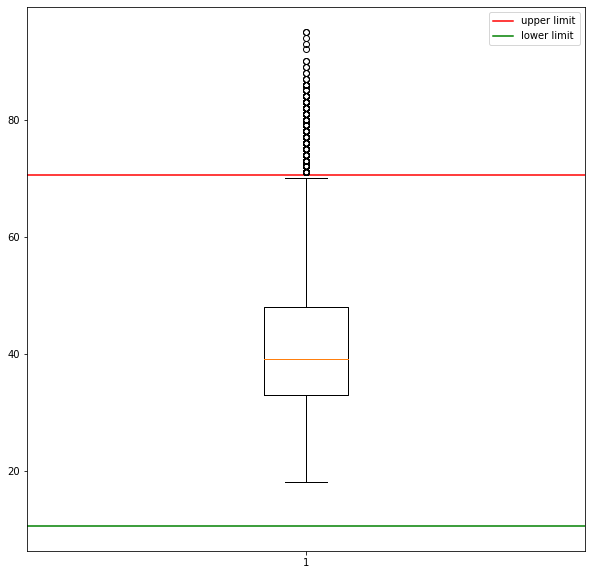

Upper Outlier: 70.5
Lower Outlier: 10.5


In [12]:
box_graph_outlier(df.age)

To centralize the data, I will take drop the data values with age above 70.5.

In [13]:
cleaned_df = df.loc[df.age < 70.5]
print("data loss:", len(df)-len(cleaned_df))

data loss: 431


In [14]:
cleaned_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
20037,36,management,single,tertiary,no,2745,yes,no,cellular,8,aug,306,3,-1,0,unknown,no
12146,52,technician,married,secondary,no,945,no,no,unknown,20,jun,16,8,-1,0,unknown,no
6926,36,blue-collar,single,secondary,no,3254,yes,no,unknown,28,may,300,3,-1,0,unknown,no
15548,33,management,married,tertiary,no,255,yes,no,cellular,21,jul,75,2,-1,0,unknown,no
12634,34,admin.,divorced,secondary,no,183,no,yes,unknown,4,jul,88,1,-1,0,unknown,no


In [15]:
df.job.value_counts()

blue-collar      8638
management       8469
technician       6765
admin.           4572
services         3694
retired          1984
self-employed    1432
entrepreneur     1310
unemployed       1154
housemaid        1116
student           818
unknown           259
Name: job, dtype: int64

In [16]:
cleaned_df.job.value_counts()

blue-collar      8636
management       8457
technician       6763
admin.           4569
services         3694
retired          1599
self-employed    1426
entrepreneur     1309
unemployed       1154
housemaid        1102
student           818
unknown           253
Name: job, dtype: int64

I can observe that age influence the job categories. Number of retired dropped from 2264 to 1830. This could make impact to the prediction result in data. But I will continually monitor and make the comparison between cleaned data vs original data.

#### Column 2: Job - candidate's type of job (Categoric)

"unknown" values in jobs column should be treated as null values. I will randomly distribute "unknown" values from other job categories.

In [17]:
def replace_unknown(data_col, result = False):
    """data_col = df[column] or df.column
        is column of a df you would like to replace unknown value
    result boolean value 
        set False in default - True will print the count of each item in column
    this function will return a list with values replacing unknown with
    random values from other values in same column"""
    #Gather all items in column
    other_values = np.array(data_col.value_counts().index)
    #Dropping unknown values
    other_values = np.delete(other_values, np.where(other_values=='unknown'))
    #Replace unknown with other items in column
    return_list = [i.replace('unknown',np.random.choice(other_values))
                  if i == 'unknown' else i for i in data_col]
    #printing count of each item (like df.value_count)
    if result:
        for item in other_values:
            print(item, return_list.count(item))
    return return_list

In [18]:
# Replace unknown values and randomly distribute
job_df = replace_unknown(cleaned_df.job, result=True)

blue-collar 8662
management 8481
technician 6786
admin. 4598
services 3716
retired 1625
self-employed 1448
entrepreneur 1327
unemployed 1185
housemaid 1114
student 838


In [19]:
#Assign list to the data frame
cleaned_df.loc[:,'job'] = job_df

In [20]:
#check if it is loaded correctly
cleaned_df.job.value_counts()

blue-collar      8662
management       8481
technician       6786
admin.           4598
services         3716
retired          1625
self-employed    1448
entrepreneur     1327
unemployed       1185
housemaid        1114
student           838
Name: job, dtype: int64

#### Column 3: Marital - marital status of candidate (Categoric)

In [21]:
cleaned_df.marital.value_counts()

married     23890
single      11337
divorced     4553
Name: marital, dtype: int64

Column Marital looks good and we will move-on to the next column

#### Column 4: Education - education status of candidate (Categoric)

In [22]:
cleaned_df.education.value_counts()

secondary    20486
tertiary     11817
primary       5889
unknown       1588
Name: education, dtype: int64

I would like to continually replace unknown value to randomly chosen value by repeating the same process from the job column.

In [23]:
#replace unknown to randomly distributed values
edu_df = replace_unknown(cleaned_df.education,result=True)

secondary 21045
tertiary 12350
primary 6385


In [24]:
#assign replaced df to education column
cleaned_df.loc[:,'education'] = edu_df

In [25]:
#check if it is loaded correctly
cleaned_df.education.value_counts()

secondary    21045
tertiary     12350
primary       6385
Name: education, dtype: int64

#### Column 5: Default - candidate's credit default status (Categoric)

Default in credit means that candidate has failed to repay a credit/loan

In [26]:
cleaned_df.default.value_counts()

no     39053
yes      727
Name: default, dtype: int64

This column shows the risk that bank has to handle with the candidate with credit default history. To reduce the bank's risk I would this candidates those who has default record since candidate's deposit account is also in risk. In other words, candidate with default history is not good to be a bank's customer. We will leave the value at this point to see the result in the end since data does not have any unknown or unexpected values.

#### Column 6: Balance - candidate's average yearly balance (Numeric)

In [27]:
cleaned_df.balance.describe()

count     39780.000000
mean       1346.503369
std        2998.942245
min       -8019.000000
25%          72.000000
50%         444.000000
75%        1410.000000
max      102127.000000
Name: balance, dtype: float64

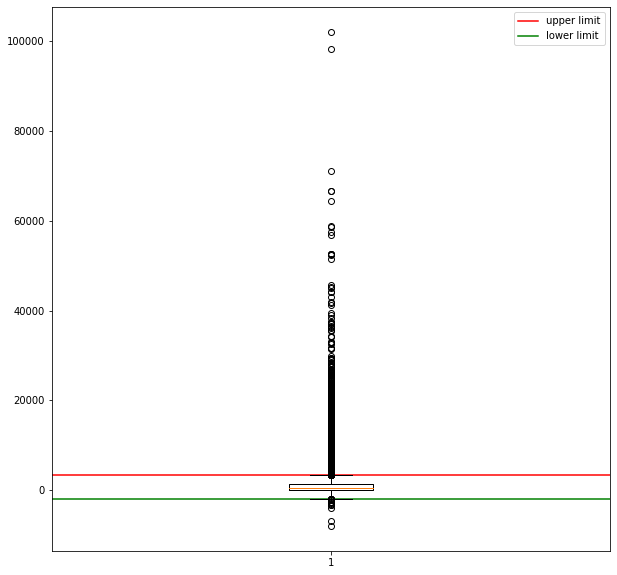

Upper Outlier: 3417.0
Lower Outlier: -1935.0


In [28]:
box_graph_outlier(cleaned_df.balance)
upper_lim, lower_lim = outlier(cleaned_df.balance)

Let us see how much data we loose after cleaning up the outliers.

In [29]:
def clean_outlier(df, col, lower, upper, loss_check=False):
    first_cleaned_df = df.loc[df[col] > lower]
    second_cleaned_df = first_cleaned_df.loc[first_cleaned_df[col] < upper]
    if loss_check:
        print("In itial data size:", len(df))
        print("Data size after lower limit",len(first_cleaned_df))
        print("Cleaned data size:",len(second_cleaned_df))
        print("Cleaned data loss:", len(df)-len(second_cleaned_df))
    return second_cleaned_df

In [30]:
cleaned_df = clean_outlier(cleaned_df, 'balance',lower_lim, upper_lim, loss_check=True)
print(len(cleaned_df))

In itial data size: 39780
Data size after lower limit 39764
Cleaned data size: 35609
Cleaned data loss: 4171
35609


I have worked with log scaling; however, negative balance made it hard to work with and result does not make sense. I will continue with the data and leave it as a future work to lessen data loss from this data cleanining.

##### Future Work  - left the work on purpose to show the blocker

In [31]:
logged_balance = np.log(cleaned_df.balance)
logged_balance = logged_balance.fillna(0)
upper_lim, lower_lim = outlier(logged_balance)
loss_upper = sum(logged_balance > upper_lim)
loss_lower = sum(logged_balance < lower_lim)
print("Total data loss:", loss_lower+loss_upper)

Total data loss: 3068


In [32]:
print(len(logged_balance))
print(sum(logged_balance>-np.inf))
print(sum(logged_balance==-np.inf))
print(sum(logged_balance.isna()))
logged_balance.fillna(1)

35609
32541
3068
0


20037    7.917536
12146    6.851185
6926     8.087640
15548    5.541264
12634    5.209486
           ...   
13729    4.574711
22019        -inf
643          -inf
20094    4.753590
18       4.094345
Name: balance, Length: 35609, dtype: float64

By using log scale, we can save about 600 data.

In [33]:
cleaned_df['logged_balance']=logged_balance
cleaned_df.groupby('logged_balance').sum()

,age,balance,day,duration,campaign,pdays,previous
logged_balance,,,,,,,
-inf,127142,0,50436,754378,9496,80062,1219
0.000000,137749,-1017749,57229,880845,10276,124284,1451
0.693147,4998,264,2050,32925,443,3364,50
1.098612,4040,315,1561,23613,364,2498,36
1.386294,4724,476,1922,30657,378,2584,53
...,...,...,...,...,...,...,...
8.134761,51,6822,37,461,3,182,2
8.135054,73,6824,27,123,6,-2,0
8.135347,51,3413,27,146,7,-1,0


In [34]:
cleaned_df['logged_balance']=logged_balance
upper_lim, lower_lim = outlier(cleaned_df.logged_balance)
clean_outlier(cleaned_df,'logged_balance', lower_lim, upper_lim, loss_check=True)

In itial data size: 35609
Data size after lower limit 32541
Cleaned data size: 32541
Cleaned data loss: 3068


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,logged_balance
20037,36,management,single,tertiary,no,2745,yes,no,cellular,8,aug,306,3,-1,0,unknown,no,7.917536
12146,52,technician,married,secondary,no,945,no,no,unknown,20,jun,16,8,-1,0,unknown,no,6.851185
6926,36,blue-collar,single,secondary,no,3254,yes,no,unknown,28,may,300,3,-1,0,unknown,no,8.087640
15548,33,management,married,tertiary,no,255,yes,no,cellular,21,jul,75,2,-1,0,unknown,no,5.541264
12634,34,admin.,divorced,secondary,no,183,no,yes,unknown,4,jul,88,1,-1,0,unknown,no,5.209486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11996,43,blue-collar,single,secondary,no,740,yes,no,unknown,20,jun,585,2,-1,0,unknown,yes,6.606650
31279,26,student,single,primary,no,598,no,no,cellular,6,mar,136,1,-1,0,unknown,no,6.393591
13729,42,self-employed,married,secondary,no,97,no,no,cellular,10,jul,108,2,-1,0,unknown,no,4.574711
20094,34,technician,married,tertiary,no,116,no,no,cellular,11,aug,145,2,-1,0,unknown,no,4.753590


In [35]:
cleaned_df['logged_balance']=logged_balance
upper_lim, lower_lim = outlier(cleaned_df.logged_balance)
print(upper_lim)
print(lower_lim)
print(sum(cleaned_df.logged_balance >= lower_lim))

11.455427416417454
-0.7474302154679204
32541


In [36]:
cleaned_df['logged_balance']=logged_balance
lower_cleaned_df = cleaned_df.loc[cleaned_df.logged_balance >= lower_lim]
print(len(cleaned_df)-len(lower_cleaned_df))
upper_cleaned_df = lower_cleaned_df.loc[lower_cleaned_df.logged_balance <= upper_lim]
print(len(cleaned_df)-len(upper_cleaned_df))


3068
3068


In [37]:
cleaned_df = cleaned_df.drop(columns=['logged_balance'])

#### Column 7: Housing - existance of Home loans (Categoric)

In [38]:
cleaned_df.housing.value_counts()

yes    20301
no     15308
Name: housing, dtype: int64

This column looks good and no further scrubbing is required at this point.

#### Column 8: Loan - existance of personal loans (Cetegoric)

In [39]:
cleaned_df.loan.value_counts()

no     29534
yes     6075
Name: loan, dtype: int64

This column also looks good and no further scrubbing is required at this point.

### Related with the last contact of the current campaign

#### Column 9: Contact - communication type (Dropped)

In [40]:
cleaned_df.contact.value_counts()

cellular     23027
unknown      10509
telephone     2073
Name: contact, dtype: int64

Since our project is related to the telemarketing, I see no influence of this column to our data. I will simply drop this column.

In [41]:
cleaned_df = cleaned_df.drop(columns=['contact'])

In [42]:
cleaned_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

#### Column 10: Day - last contact day of the month (Numeric --> Categoric)

Thought this seems numeric, it is a categorial column. We can simply divide the sections, 1~10 beginning of the month, 11~20 midddle of the month and 21~31 end of the month.

In [43]:
cleaned_df.day.describe()

count    35609.000000
mean        15.768654
std          8.367000
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

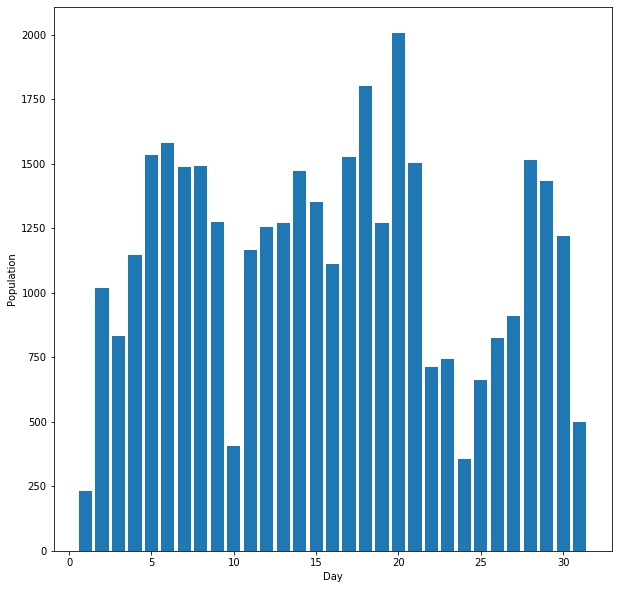

In [44]:
bar_graph(cleaned_df,'day')

In [45]:
dmap = {}
beginning = list(range(1,11))
middle = list(range(11,21))
ending = list(range(21,32))
for i in beginning: dmap[i]="Beginning"
for i in middle: dmap[i]="Middle"
for i in ending: dmap[i]="End"
per = []
for i in cleaned_df.day:
    per.append(dmap.get(i))
per[:5]

['Beginning', 'Middle', 'End', 'End', 'Beginning']

In [46]:
cleaned_df["period"] = per
cleaned_df = cleaned_df.drop(columns=['day'],index=1)

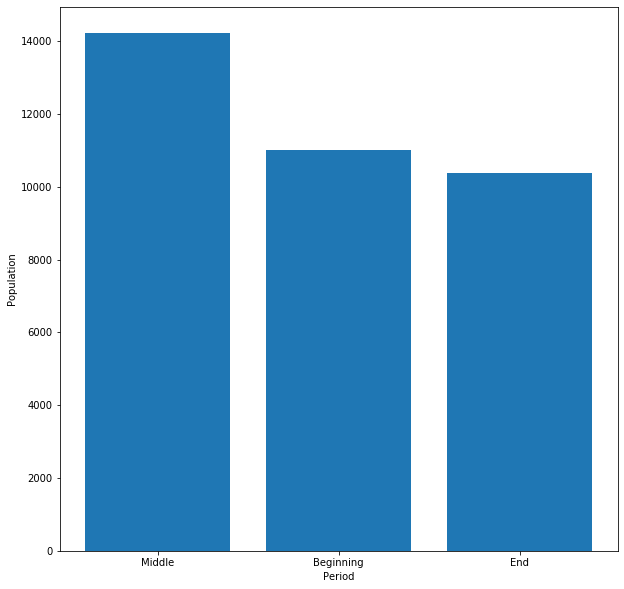

In [47]:
bar_graph(cleaned_df,'period')

#### Column 11: Month - last contact month of year (Categoric)

In [48]:
cleaned_df.month.value_counts()

may    11280
jul     5710
aug     4910
jun     4134
nov     2685
apr     2265
feb     2116
jan     1160
oct      477
sep      399
mar      319
dec      153
Name: month, dtype: int64

This column is a categorical column since it does not have any null values, I will leave it was it is.

#### Column 12: Duration - duration of last call (Numeric)

In [49]:
cleaned_df.duration.describe()

count    35608.000000
mean       254.699843
std        254.948137
min          0.000000
25%        102.000000
50%        178.000000
75%        314.000000
max       3881.000000
Name: duration, dtype: float64

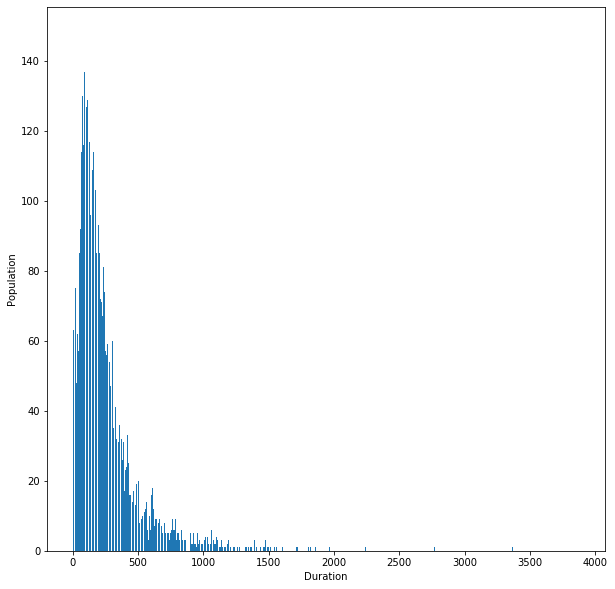

In [50]:
bar_graph(cleaned_df,'duration')

It definitely look like there are some outliers we need to clean.

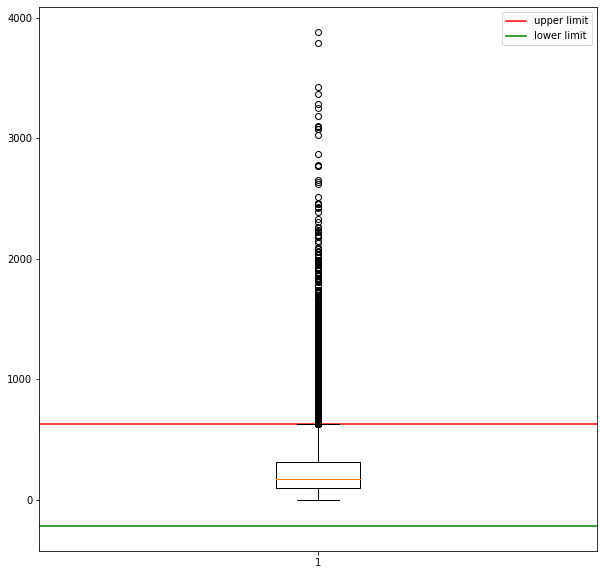

Upper Outlier: 632.0
Lower Outlier: -216.0


In [51]:
box_graph_outlier(cleaned_df.duration)

In [52]:
upper_lim, lower_lim = outlier(cleaned_df.duration)
clean_outlier(cleaned_df, 'duration', lower_lim, upper_lim, loss_check=True)

In itial data size: 35608
Data size after lower limit 35608
Cleaned data size: 33035
Cleaned data loss: 2573


,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome,y,period
20037,36,management,single,tertiary,no,2745,yes,no,aug,306,3,-1,0,unknown,no,Beginning
12146,52,technician,married,secondary,no,945,no,no,jun,16,8,-1,0,unknown,no,Middle
6926,36,blue-collar,single,secondary,no,3254,yes,no,may,300,3,-1,0,unknown,no,End
15548,33,management,married,tertiary,no,255,yes,no,jul,75,2,-1,0,unknown,no,End
12634,34,admin.,divorced,secondary,no,183,no,yes,jul,88,1,-1,0,unknown,no,Beginning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13729,42,self-employed,married,secondary,no,97,no,no,jul,108,2,-1,0,unknown,no,Beginning
22019,44,management,married,tertiary,no,0,yes,no,aug,141,3,-1,0,unknown,no,Middle
643,42,technician,single,secondary,no,0,yes,no,may,293,1,-1,0,unknown,no,Beginning
20094,34,technician,married,tertiary,no,116,no,no,aug,145,2,-1,0,unknown,no,Middle


I will check if log scale can reduce the data loss since all values are positive.

In [53]:
test_df = cleaned_df.copy()
test_df.loc[test_df.duration == 0]=0.00001
test_df['logged_duration']=np.log(test_df.duration)
upper_lim, lower_lim = outlier(test_df.logged_duration)
clean_outlier(test_df,'logged_duration', lower_lim, upper_lim, loss_check=True)

In itial data size: 35608
Data size after lower limit 34702
Cleaned data size: 34594
Cleaned data loss: 1014


,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome,y,period,logged_duration
20037,36.0,management,single,tertiary,no,2745.0,yes,no,aug,306.0,3.0,-1.0,0.0,unknown,no,Beginning,5.723585
6926,36.0,blue-collar,single,secondary,no,3254.0,yes,no,may,300.0,3.0,-1.0,0.0,unknown,no,End,5.703782
15548,33.0,management,married,tertiary,no,255.0,yes,no,jul,75.0,2.0,-1.0,0.0,unknown,no,End,4.317488
12634,34.0,admin.,divorced,secondary,no,183.0,no,yes,jul,88.0,1.0,-1.0,0.0,unknown,no,Beginning,4.477337
20668,52.0,admin.,married,secondary,no,692.0,yes,no,aug,129.0,9.0,-1.0,0.0,unknown,no,Middle,4.859812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13729,42.0,self-employed,married,secondary,no,97.0,no,no,jul,108.0,2.0,-1.0,0.0,unknown,no,Beginning,4.682131
22019,44.0,management,married,tertiary,no,0.0,yes,no,aug,141.0,3.0,-1.0,0.0,unknown,no,Middle,4.948760
643,42.0,technician,single,secondary,no,0.0,yes,no,may,293.0,1.0,-1.0,0.0,unknown,no,Beginning,5.680173
20094,34.0,technician,married,tertiary,no,116.0,no,no,aug,145.0,2.0,-1.0,0.0,unknown,no,Middle,4.976734


By log scaling of the data I was albe to lessen the loss. I will apply it to the original data.

In [54]:
cleaned_df.loc[cleaned_df.duration == 0]=0.00001
cleaned_df['logged_duration'] = np.log(cleaned_df.duration)
upper_lim, lower_lim = outlier(cleaned_df.logged_duration)
cleaned_df=clean_outlier(cleaned_df, 'logged_duration', lower_lim, upper_lim, loss_check=True)

In itial data size: 35608
Data size after lower limit 34702
Cleaned data size: 34594
Cleaned data loss: 1014


### Other Attributes

#### Column 13: Campaign - number of contact performed (Numeric)

In [55]:
cleaned_df.campaign.describe()

count    34594.000000
mean         2.667804
std          2.872906
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         55.000000
Name: campaign, dtype: float64

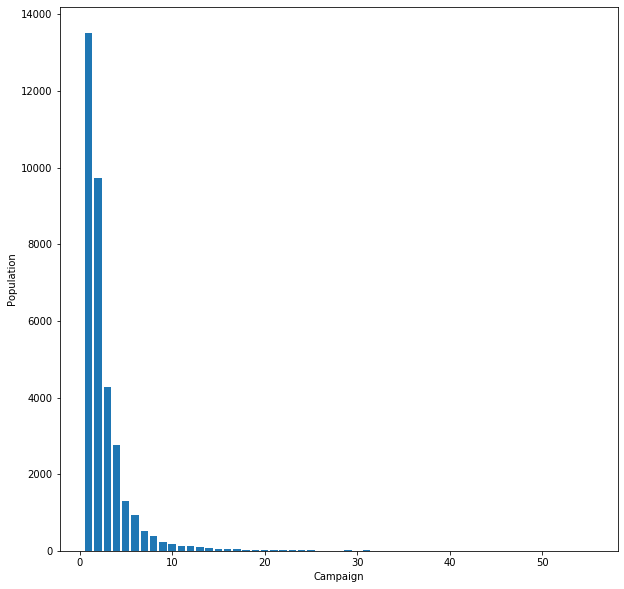

In [56]:
bar_graph(cleaned_df,'campaign')

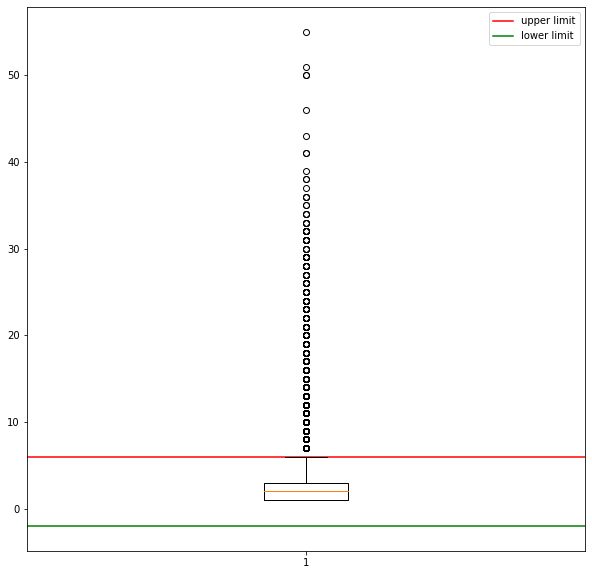

Upper Outlier: 6.0
Lower Outlier: -2.0


In [57]:
box_graph_outlier(cleaned_df.campaign)

We will simply clean out the outliers. Using previous methods.

In [58]:
upper_lim, lower_lim = outlier(cleaned_df.campaign)
clean_outlier(cleaned_df,'campaign', lower_lim, upper_lim, loss_check=True)

In itial data size: 34594
Data size after lower limit 34594
Cleaned data size: 31568
Cleaned data loss: 3026


,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome,y,period,logged_duration
20037,36.0,management,single,tertiary,no,2745.0,yes,no,aug,306.0,3.0,-1.0,0.0,unknown,no,Beginning,5.723585
6926,36.0,blue-collar,single,secondary,no,3254.0,yes,no,may,300.0,3.0,-1.0,0.0,unknown,no,End,5.703782
15548,33.0,management,married,tertiary,no,255.0,yes,no,jul,75.0,2.0,-1.0,0.0,unknown,no,End,4.317488
12634,34.0,admin.,divorced,secondary,no,183.0,no,yes,jul,88.0,1.0,-1.0,0.0,unknown,no,Beginning,4.477337
35666,45.0,admin.,single,secondary,no,0.0,yes,no,may,38.0,1.0,-1.0,0.0,unknown,no,Beginning,3.637586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13729,42.0,self-employed,married,secondary,no,97.0,no,no,jul,108.0,2.0,-1.0,0.0,unknown,no,Beginning,4.682131
22019,44.0,management,married,tertiary,no,0.0,yes,no,aug,141.0,3.0,-1.0,0.0,unknown,no,Middle,4.948760
643,42.0,technician,single,secondary,no,0.0,yes,no,may,293.0,1.0,-1.0,0.0,unknown,no,Beginning,5.680173
20094,34.0,technician,married,tertiary,no,116.0,no,no,aug,145.0,2.0,-1.0,0.0,unknown,no,Middle,4.976734


Trying log scaling

In [59]:
test_df = cleaned_df.copy()
test_df['logged_campaign']=np.log(test_df.campaign)
upper_lim, lower_lim = outlier(test_df.logged_campaign)
clean_outlier(test_df,'logged_campaign', lower_lim, upper_lim, loss_check=True)

In itial data size: 34594
Data size after lower limit 34594
Cleaned data size: 34273
Cleaned data loss: 321


,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome,y,period,logged_duration,logged_campaign
20037,36.0,management,single,tertiary,no,2745.0,yes,no,aug,306.0,3.0,-1.0,0.0,unknown,no,Beginning,5.723585,1.098612
6926,36.0,blue-collar,single,secondary,no,3254.0,yes,no,may,300.0,3.0,-1.0,0.0,unknown,no,End,5.703782,1.098612
15548,33.0,management,married,tertiary,no,255.0,yes,no,jul,75.0,2.0,-1.0,0.0,unknown,no,End,4.317488,0.693147
12634,34.0,admin.,divorced,secondary,no,183.0,no,yes,jul,88.0,1.0,-1.0,0.0,unknown,no,Beginning,4.477337,0.000000
20668,52.0,admin.,married,secondary,no,692.0,yes,no,aug,129.0,9.0,-1.0,0.0,unknown,no,Middle,4.859812,2.197225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13729,42.0,self-employed,married,secondary,no,97.0,no,no,jul,108.0,2.0,-1.0,0.0,unknown,no,Beginning,4.682131,0.693147
22019,44.0,management,married,tertiary,no,0.0,yes,no,aug,141.0,3.0,-1.0,0.0,unknown,no,Middle,4.948760,1.098612
643,42.0,technician,single,secondary,no,0.0,yes,no,may,293.0,1.0,-1.0,0.0,unknown,no,Beginning,5.680173,0.000000
20094,34.0,technician,married,tertiary,no,116.0,no,no,aug,145.0,2.0,-1.0,0.0,unknown,no,Middle,4.976734,0.693147


It reduces the loss significantly! Now apply it to the data.

In [60]:
cleaned_df['logged_campaign']=np.log(cleaned_df.campaign)
upper_lim, lower_lim = outlier(cleaned_df.logged_campaign)
cleaned_df=clean_outlier(cleaned_df, 'logged_campaign', lower_lim, upper_lim, loss_check=True)

In itial data size: 34594
Data size after lower limit 34594
Cleaned data size: 34273
Cleaned data loss: 321


#### Column 14: Pdays - days passed since last contacted (Numeric)

In [61]:
cleaned_df.pdays.describe()

count    34273.000000
mean        40.155779
std        100.460497
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

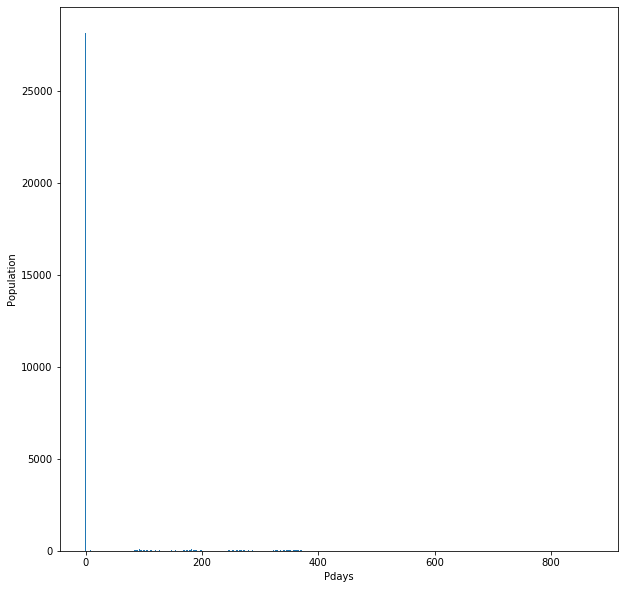

In [62]:
bar_graph(cleaned_df,'pdays')

It seems like this column is heavily skewed to the left and will make not much impact on the data. I will just leave the column as it is.

#### Column 15: Previous - number of contacts performed before the campaign (Numeric)

In [63]:
cleaned_df.previous.describe()

count    34273.000000
mean         0.553234
std          2.324545
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

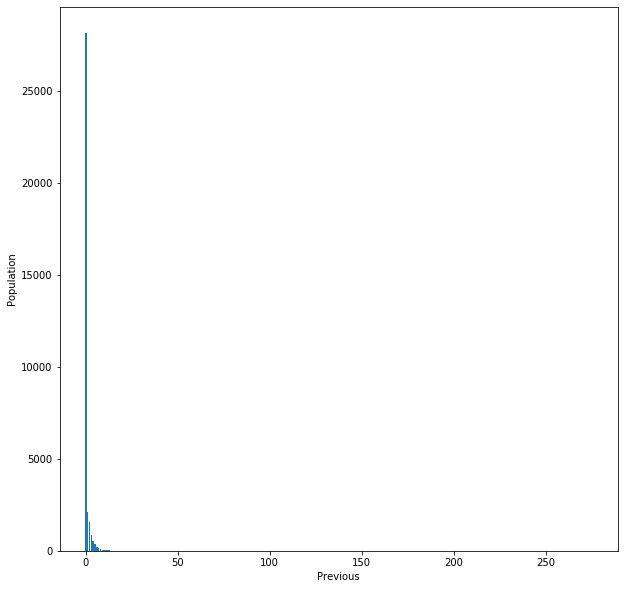

In [64]:
bar_graph(cleaned_df,"previous")

It seems like this column is also heavily skewed to the left and will make not much impact on the data. I will just leave the column as it is.

#### Column 16: poutcome - outome of the previous marketing campaign (Categoric)

In [65]:
cleaned_df.poutcome.value_counts()

unknown    28126
failure     3741
other       1322
success     1084
Name: poutcome, dtype: int64

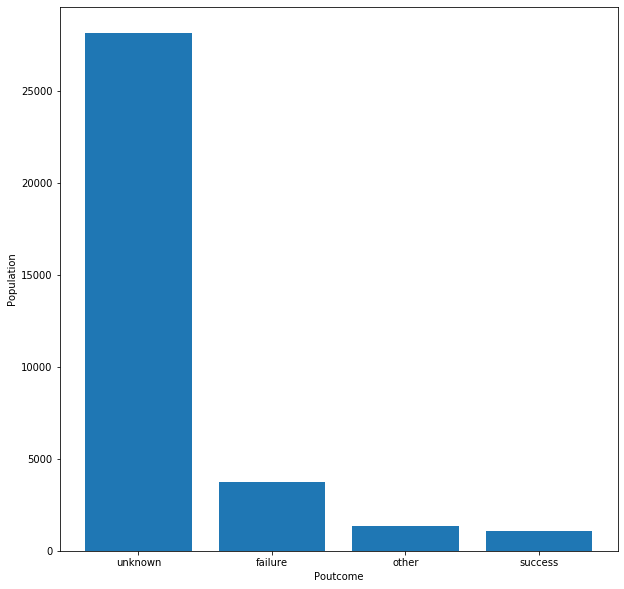

In [66]:
bar_graph(cleaned_df, 'poutcome')

If I can understand this column correctly, most of the unknown value could mean that the group was not contacted previously. Let us look at the some data quickly before making such decisions.

In [67]:
test = cleaned_df.loc[cleaned_df.poutcome =='unknown']
print(len(test))
test.loc[test.previous>0]

28126


,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome,y,period,logged_duration,logged_campaign
43978,30.0,technician,single,secondary,no,254.0,yes,yes,jun,167.0,3.0,416.0,2.0,unknown,no,End,5.117994,1.098612
40658,61.0,retired,married,tertiary,no,3140.0,yes,yes,aug,975.0,4.0,98.0,1.0,unknown,yes,Beginning,6.882437,1.386294
42042,26.0,admin.,single,secondary,no,338.0,no,no,oct,209.0,1.0,188.0,2.0,unknown,yes,End,5.342334,0.000000
41821,39.0,management,married,tertiary,no,184.0,no,no,oct,206.0,1.0,168.0,5.0,unknown,no,Middle,5.327876,0.000000


Out of 28127 data "unknown" poutcome values, we can see there are only 4 previously contacted candidates. Perhaps we can treat "unknown" to be "never contacted" or "does not apply". Before considering to drop the column, I would like to keep this data set since it is holding very interesting facts.

In [68]:
print("Original Data Set Size:",len(df))
print("Final Data Set Size after clean:",len(cleaned_df))
print("Data Loss after clean up:", len(df)-len(cleaned_df))

Original Data Set Size: 40211
Final Data Set Size after clean: 34273
Data Loss after clean up: 5938


Our dataset shape after clean up is not too bad. We will proceed with the exploration of the Data.

In [69]:
cleaned_df = cleaned_df.drop(columns=['duration', 'campaign'])

In [70]:
cleaned_df[cleaned_df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,month,pdays,previous,poutcome,y,period,logged_duration,logged_campaign


There are no duplicated data existing

## Data Exploration

### Starting Point: Business' Overall Success Rate 

In [71]:
len(cleaned_df)

34273

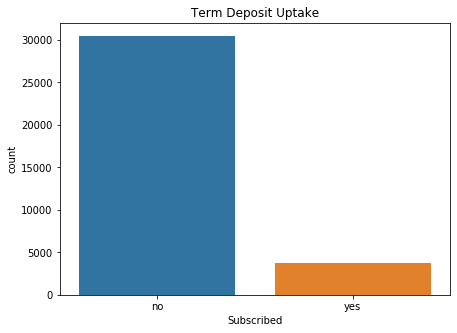

In [72]:
plt.figure(figsize = (7,5))
sns.countplot(cleaned_df['y'])
plt.xlabel('Subscribed')
plt.title('Term Deposit Uptake')
plt.savefig('target.jpeg',dpi=300, bbox_inches= 'tight')
plt.show()

In [73]:
cleaned_df.y.value_counts(normalize=True)

no     0.889388
yes    0.110612
Name: y, dtype: float64

We can definitely expect that this is not an easy business. Initial success rate is 11.1%. There could be many factors that can make impact to the result like bank's image, exposure and etc. However, one thing we can surely say cold calling is a challenging task.
<br>
However, I think that is why we are doing this to check what features bring up higher chances of subscription. <br>
I will start exploring the data to see the features that could bring up the subscription rate from 11.1%.

### Data Overview

In [74]:
cleaned_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'month', 'pdays', 'previous', 'poutcome', 'y', 'period',
       'logged_duration', 'logged_campaign'],
      dtype='object')

Separating columns by numerical and categoricl columns.

In [75]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome','period']
num_cols = ['age', 'balance', 'pdays', 'previous', 'logged_duration', 'logged_campaign']

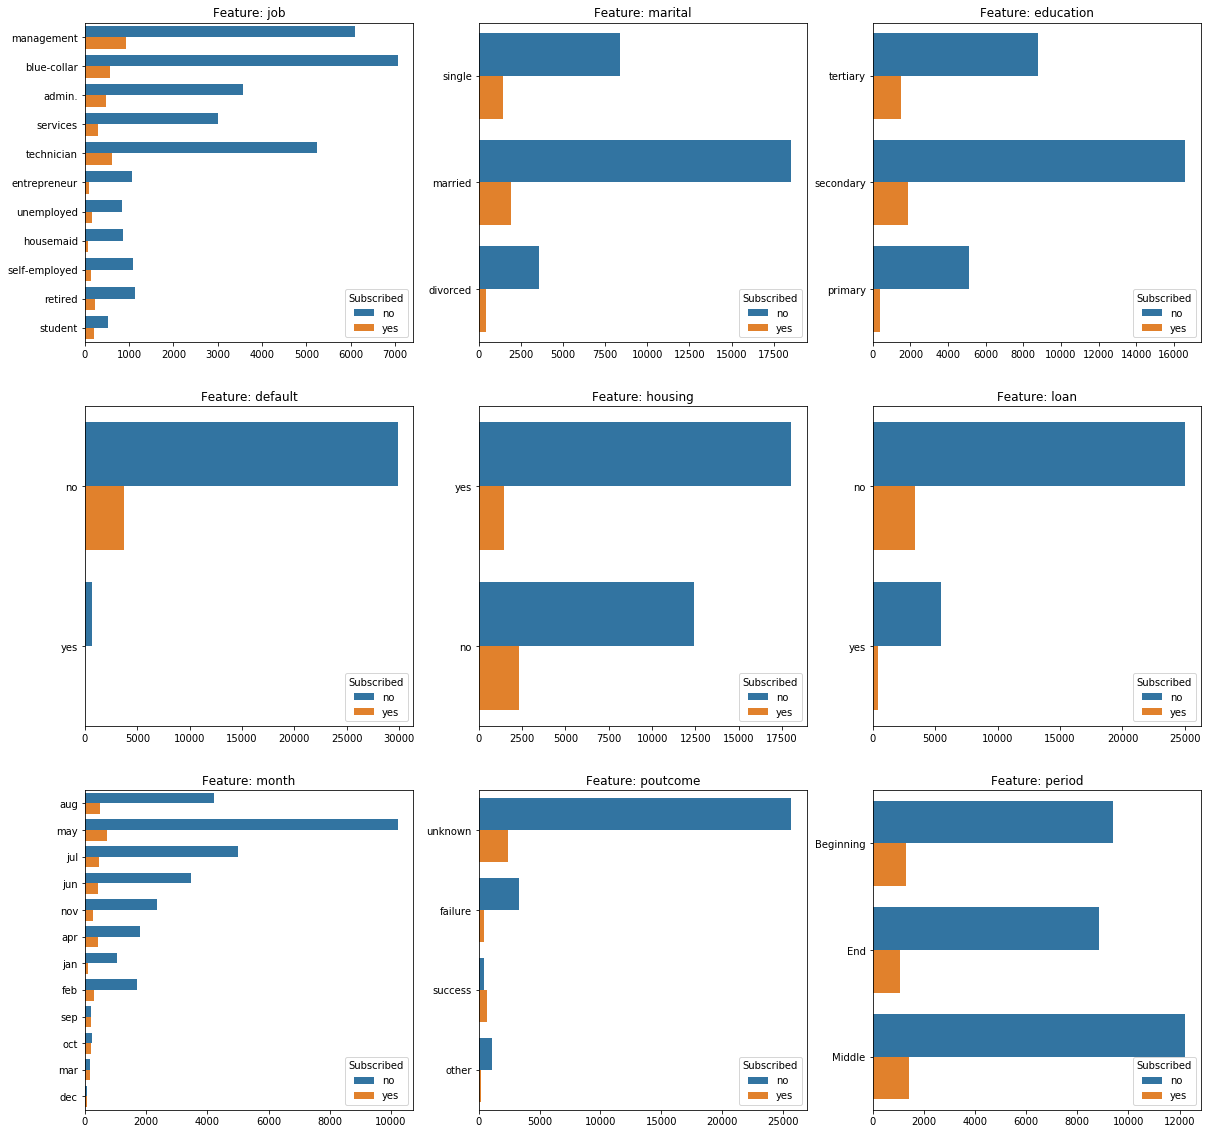

In [76]:
cat_feats = cat_cols

# Create barplot of categorical features with hue target variable

fig, axes = plt.subplots(3,3, figsize = (20,20))

for c, col in enumerate(cat_feats):
    ax_x = c // 3
    ax_y = c % 3
    sns.countplot(y = cleaned_df[col], orient = 'h', hue = cleaned_df['y'], 
                  ax = axes[ax_x, ax_y])
    
    axes[ax_x, ax_y].set_title(f'Feature: {col}')
    axes[ax_x, ax_y].set_ylabel(None) 
    axes[ax_x, ax_y].set_xlabel(None) 
    axes[ax_x, ax_y].legend(title = "Subscribed", loc = 'lower right') 
plt.show()

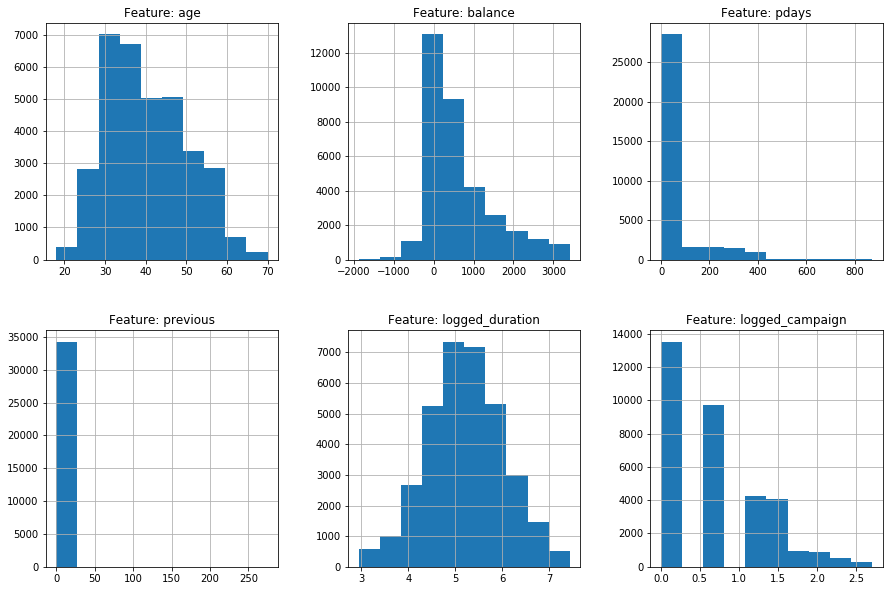

In [77]:
fig, axes = plt.subplots(2,3, figsize = (15,10))
for c, column in enumerate(num_cols):
    ax_x = c // 3
    ax_y = c % 3
    
    cleaned_df.hist(column=column, ax = axes[ax_x, ax_y])
    
    axes[ax_x, ax_y].set_title(f'Feature: {column}')
    axes[ax_x, ax_y].set_ylabel(None) 
    axes[ax_x, ax_y].set_xlabel(None) 
plt.show()


### Categorical Columns

I will first take a look at the categorical column and observe the features and relation to the outcome.

#### 1. Job

First Categorical column we will look is job.

In [78]:
observing_df = cleaned_df[['job', 'y']]
observing_df.job.value_counts()

blue-collar      7616
management       7025
technician       5861
admin.           4054
services         3305
retired          1368
self-employed    1230
entrepreneur     1141
unemployed       1006
housemaid         946
student           721
Name: job, dtype: int64

There are 11 different job categories in the data and each job has different population. So, we will normalize the the subscription rate and see which job category had the most successful result.

In [79]:
job_df = observing_df.groupby('job').y.value_counts(normalize=True).unstack()
job_df

y,no,yes
job,,
admin.,0.881352,0.118648
blue-collar,0.927127,0.072873
entrepreneur,0.923751,0.076249
housemaid,0.916490,0.083510
management,0.867046,0.132954
retired,0.829678,0.170322
self-employed,0.881301,0.118699
services,0.912557,0.087443
student,0.714286,0.285714


I have the result. Now I will sort it out for the better understanding of the result.

In [80]:
job_df.columns[1]

'yes'

In [81]:
job_df = job_df.sort_values(by='yes',ascending=False)
job_df

y,no,yes
job,,
student,0.714286,0.285714
retired,0.829678,0.170322
unemployed,0.831014,0.168986
management,0.867046,0.132954
self-employed,0.881301,0.118699
admin.,0.881352,0.118648
technician,0.895752,0.104248
services,0.912557,0.087443
housemaid,0.916490,0.083510


Now to Visualization.

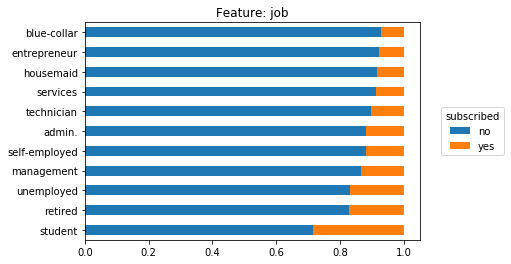

In [82]:
job_df.plot.barh(stacked = True)
# Have legend to the side
plt.legend(
    loc = 'center left',
    bbox_to_anchor = (1.05,0.5),
    title = 'subscribed')
plt.title(label='Feature: job')
plt.ylabel(None)
plt.show()

As we can see, the best group to approach is student group, retired, unemployed, management, admin and self-employed has success rate above 11.1% and rest are below average. 

#### Function: explore_column

To simplify the next steps for each columns, I will make the function that does the steps above.

In [83]:
def explore_column(col, tar, df, ascending=False, visual=True, figsize=[7,7]):
    '''This function returns the data frame with the normalized and sorted target group
    col: categorical column to explore
    tar: target result column
    df: dataframe to work with
    ascending: default at False
    visual: default at True will show horizontal bar graph'''
    observing_df = df[[col, tar]]
    return_df = observing_df.groupby(col)[tar].value_counts(normalize=True).unstack()
    by = return_df.columns[1]
    return_df = return_df.sort_values(by=by,ascending=ascending)
    if visual:
        return_df.plot.barh(stacked = True, figsize=figsize)
        # Have legend to the side
        plt.axvline(x=1-.1106,label='Initial Success Rate',c='red')
        plt.legend(
            loc = 'center left',
            bbox_to_anchor = (1.05,0.5),
            title = 'target result')
        plt.title(label='Feature:'+ col.capitalize())
        plt.ylabel(None)
        value = input("Title of the Graph:")
        plt.savefig(value, dpi=300, bbox_inches='tight')
        plt.show()
    return return_df

Let us test the function.

Title of the Graph:Test Model


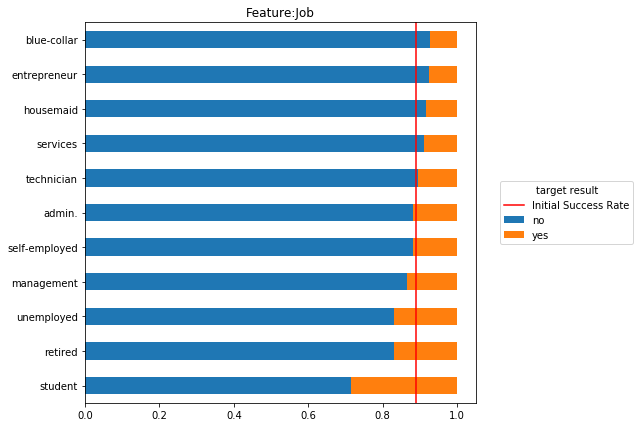

y,no,yes
job,,
student,0.714286,0.285714
retired,0.829678,0.170322
unemployed,0.831014,0.168986
management,0.867046,0.132954
self-employed,0.881301,0.118699
admin.,0.881352,0.118648
technician,0.895752,0.104248
services,0.912557,0.087443
housemaid,0.916490,0.083510


In [84]:
explore_column('job', 'y', cleaned_df)

#### 2. Marital

Title of the Graph:Marital Vs Subscription Rate


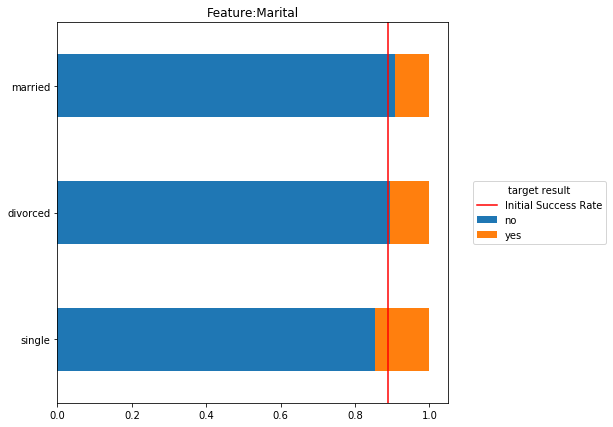

y,no,yes
marital,,
single,0.852800,0.147200
divorced,0.892893,0.107107
married,0.906223,0.093777


In [85]:
explore_column('marital', 'y', cleaned_df)

From this result we can say targeting single group will bring up the result since single group has 14.7% of success rate.

#### 3. Education

Title of the Graph:Education Vs Subscription Rate


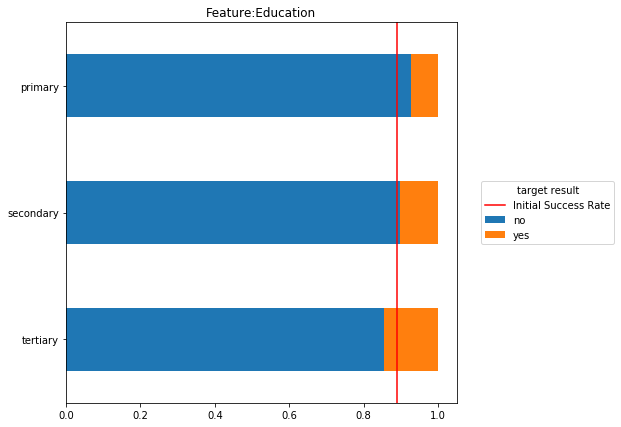

y,no,yes
education,,
tertiary,0.854498,0.145502
secondary,0.897455,0.102545
primary,0.927312,0.072688


In [86]:
explore_column('education', 'y', cleaned_df)

Through this result we would target the tertiary group to bring up the result. Success rate for this group is at 14.6%

#### 4. Default

By nature of this feature, we can expect that default group will definitely cannot make the deposit and with such a history bank's deposit won't last long. However, we will still explore the result.

Title of the Graph:Default vs Subscription Rate


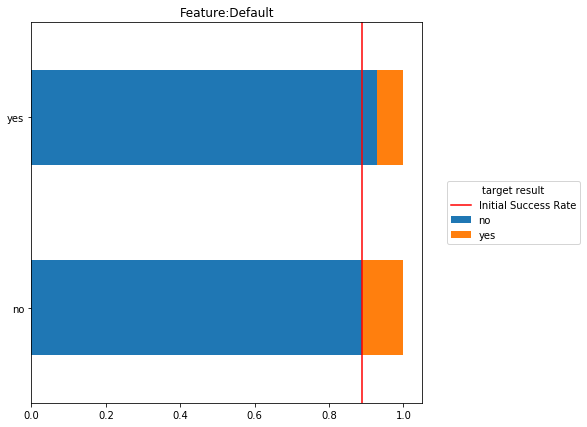

y,no,yes
default,,
no,0.888608,0.111392
yes,0.927941,0.072059


In [87]:
explore_column('default', 'y', cleaned_df)

Definite result shows. The group with default will bring down the result. Knowing this factor is very important by avoiding this group, we can get slightly better result.

#### 5. Housing

Title of the Graph:Housing vs Subscription Rate


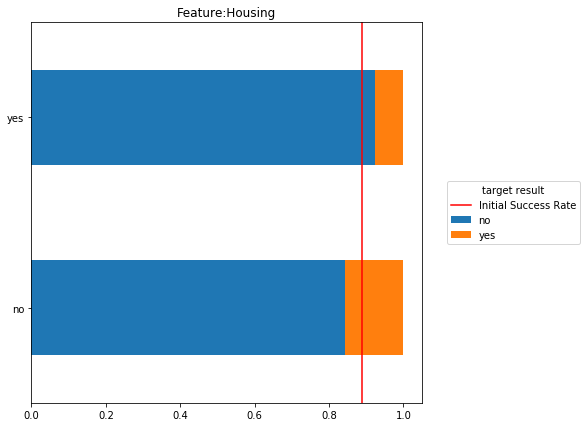

y,no,yes
housing,,
no,0.842729,0.157271
yes,0.924673,0.075327


In [88]:
explore_column('housing', 'y', cleaned_df)

Target group with no housing loan has 15.7 % of success rate. We should focus on the group with no housing loan.

#### 6. Loan

Title of the Graph:Loan vs Subscription Rate


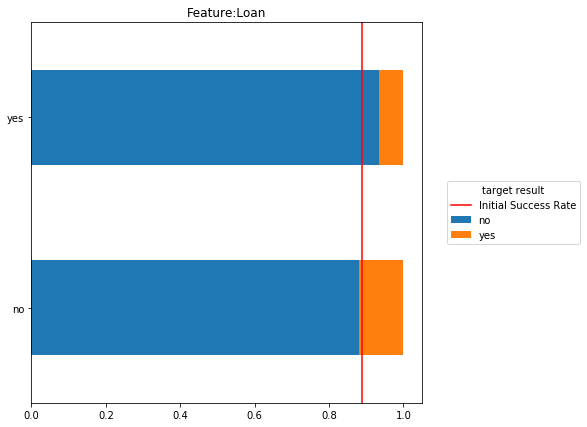

y,no,yes
loan,,
no,0.880222,0.119778
yes,0.934041,0.065959


In [89]:
explore_column('loan', 'y', cleaned_df)

Group with no personal loan has slightly higher results of 12.0%.

#### 7. Month

This column is interesting to see the timing of the year. When to perform the campaign to bring out the best results.

Title of the Graph:Monthly Subscription Rate


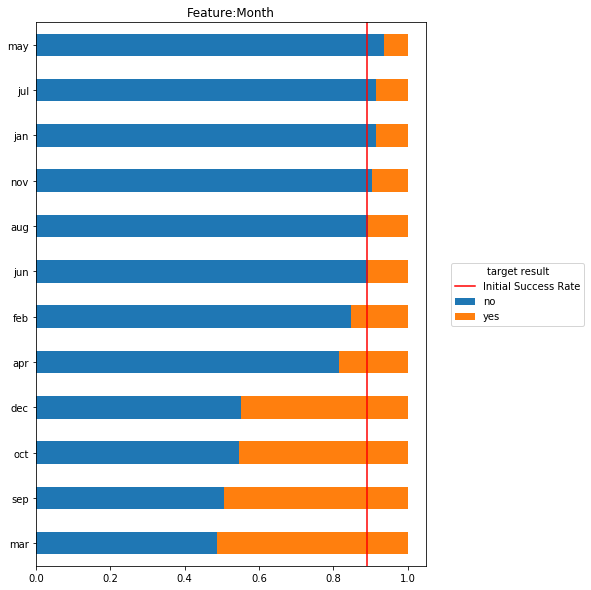

y,no,yes
month,,
mar,0.485714,0.514286
sep,0.506739,0.493261
oct,0.545657,0.454343
dec,0.551020,0.448980
apr,0.814027,0.185973
feb,0.846384,0.153616
jun,0.892177,0.107823
aug,0.893455,0.106545
nov,0.902746,0.097254


In [90]:
explore_column('month', 'y', cleaned_df, figsize=[7,10])

Following month had the best success rate results: March, September, October, December, April, and February. <br>
To bring out the best result, I would run the campaign on February to April then September to October and finish it on December to minimize the operation cost and bring out the best results.

#### 8. Previous Outcome (poutcome):

Title of the Graph:Previous Outcome Subscription Rate


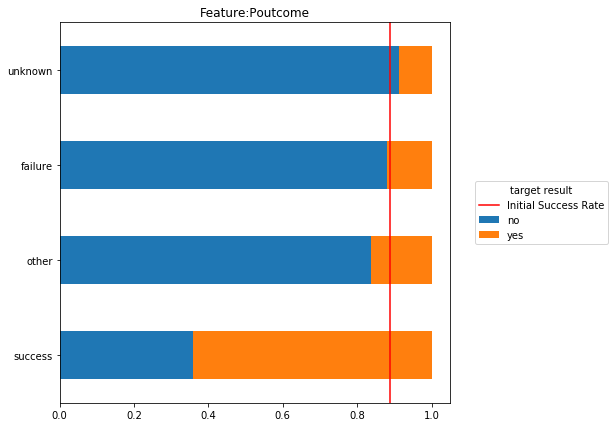

y,no,yes
poutcome,,
success,0.357934,0.642066
other,0.836611,0.163389
failure,0.878909,0.121091
unknown,0.913745,0.086255


In [91]:
explore_column('poutcome', 'y', cleaned_df)

This column holds important information. We can approach this column by previously contacted vs first time caller. As we scrubbed the column above, feature poutcome of 'unknown' was the column that client was never contaced before except 4 individual. In despite of the previous contact results, we can definitely see better outcome especially one succeed previously with 64.2% success rate. Other (16.3%) and failure(12.1%) also can be observed better rate than the initial results of 11.1%. <br>
Through this, we can assume that building relationship with customer is very important process of successness of the campaign. When the client is approached previously, outcome was higher. So, it is definitely worth a shot to contact the group that was approched before and it is also important to call new client for future campaign for better result.

#### 9. Period (Another timing of campaign) - which period of the month to approach the clients

Title of the Graph:Periodic Subscription Rate


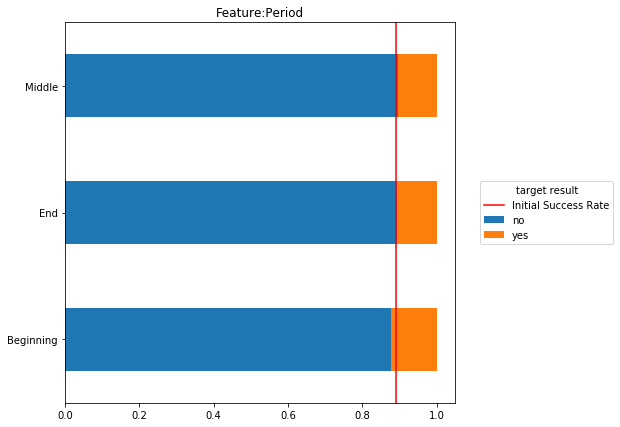

y,no,yes
period,,
Beginning,0.878049,0.121951
End,0.893866,0.106134
Middle,0.895022,0.104978


In [92]:
explore_column('period', 'y', cleaned_df)

Though it is a slight increase, but I would contact customer on the beginning of the month to bring out the better results.

### Numeric Columns

Next we will explore the numeric columns.

We will start with checking the existence of any multicollinearity.

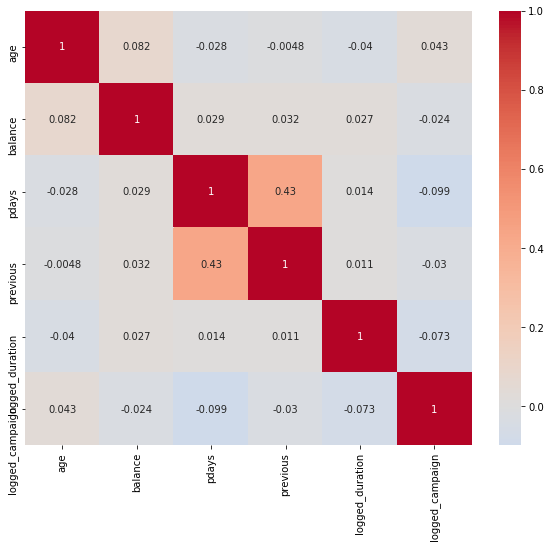

In [93]:
corr=cleaned_df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
b, t = plt.ylim()
plt.ylim(b+.5, t-.5) 
plt.show() 

There are not mulicollinearity existing to the dataset and we will move onward on oberving each column.

#### Age

Unlike any other numeric colums I was to observe column 'age' can be also categorical. So, I have applied the explore_column function to this column and found something interesting.

Title of the Graph:Age Vs Subscription Rate


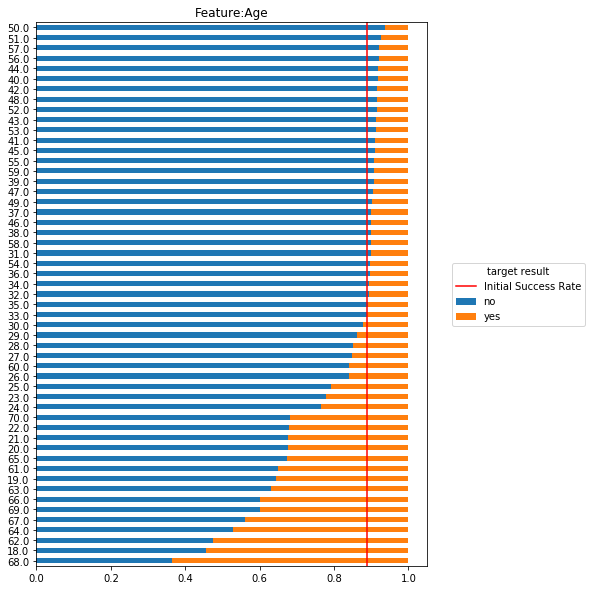

y,no,yes
age,,
68.0,0.363636,0.636364
18.0,0.454545,0.545455
62.0,0.473684,0.526316
64.0,0.527273,0.472727
67.0,0.560976,0.439024
69.0,0.600000,0.400000
66.0,0.600000,0.400000
63.0,0.629630,0.370370
19.0,0.642857,0.357143


In [94]:
explore_column('age', 'y',cleaned_df, figsize=[7,10], )

Following age Group had higher sucess rate compare to other age group.<br>
Age Group 30 and Younger.<br>
Age Group 60 and Older.

In other words, age group between 31 to 59 tend to have lower success rate.

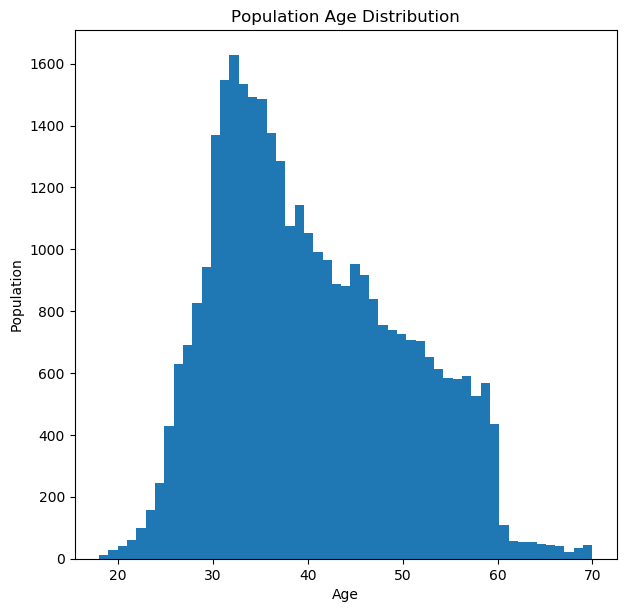

In [95]:
plt.figure(figsize=[7,7], dpi=100)
plt.hist(cleaned_df.age, bins='auto')
plt.title("Population Age Distribution")
plt.xlabel('Age')
plt.ylabel('Population')
plt.savefig("Population Age", dpi=300, bbox_inches='tight')
plt.show()

Title of the Graph:age


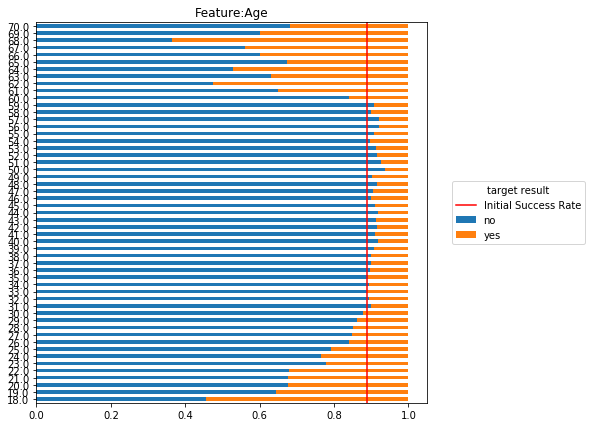

In [96]:
col = 'age'
tar = 'y'
figsize=[7,7]
observing_df = cleaned_df.copy()
observing_df = observing_df[[col, tar]]
return_df = observing_df.groupby(col)[tar].value_counts(normalize=True).unstack()
return_df.plot.barh(stacked = True, figsize=figsize)
# Have legend to the side
plt.axvline(x=1-.1106,label='Initial Success Rate',c='red')
plt.legend(
    loc = 'center left',
    bbox_to_anchor = (1.05,0.5),
    title = 'target result')
plt.title(label='Feature:'+ col.capitalize())
plt.ylabel(None)
value = input("Title of the Graph:")
plt.savefig(value, dpi=300, bbox_inches='tight')
plt.show()

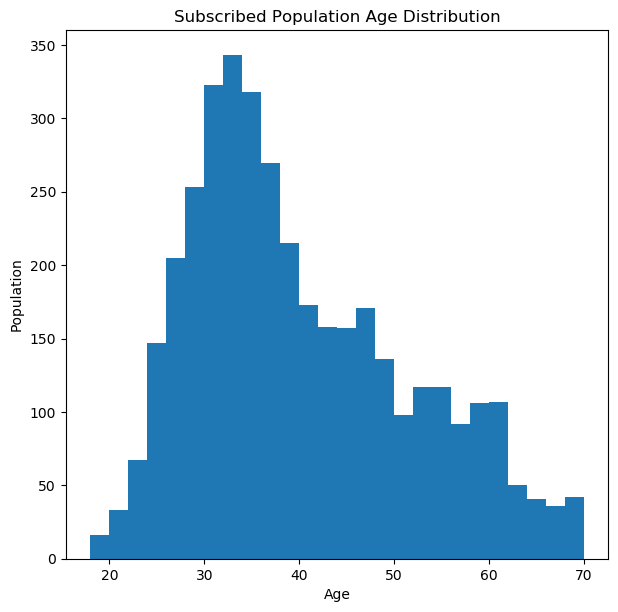

In [97]:
plt.figure(figsize=[7,7], dpi=100)
plt.hist(cleaned_df[cleaned_df.y=='yes'].age, bins='auto')
plt.title("Subscribed Population Age Distribution")
plt.xlabel('Age')
plt.ylabel('Population')
plt.savefig("Subscribed Population Age", dpi=300, bbox_inches='tight')
plt.show()

## Data Modeling

### Preparing Data for Modeling

In [98]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34273 entries, 20037 to 18
Data columns (total 16 columns):
age                34273 non-null float64
job                34273 non-null object
marital            34273 non-null object
education          34273 non-null object
default            34273 non-null object
balance            34273 non-null float64
housing            34273 non-null object
loan               34273 non-null object
month              34273 non-null object
pdays              34273 non-null float64
previous           34273 non-null float64
poutcome           34273 non-null object
y                  34273 non-null object
period             34273 non-null object
logged_duration    34273 non-null float64
logged_campaign    34273 non-null float64
dtypes: float64(6), object(10)
memory usage: 5.7+ MB


In [99]:
# Reset df index
cleaned_df = cleaned_df.reset_index(drop = True)

# Split into features X/ target y
X = cleaned_df.drop('y', axis = 1)
y = cleaned_df.y

In [100]:
y = y.map(lambda x: 1 if x == 'yes' else 0)
y.value_counts()

0    30482
1     3791
Name: y, dtype: int64

### Feature Scaling - Numerical Columns

In [101]:
# Get data of numerical type
X_num = X.select_dtypes(include = np.number)

# Get data of categorical type
X_cat = X.select_dtypes(include = object)

# Instantiate Class
ss = StandardScaler()

# Fit and Transform Data
X_num_scaled = ss.fit_transform(X_num)

# Recreate DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled, columns = X_num.columns)
X_num_scaled.head()

,age,balance,pdays,previous,logged_duration,logged_campaign
0,-0.438256,2.527331,-0.409677,-0.238,0.618640,0.655446
1,-0.438256,3.137150,-0.409677,-0.238,0.594272,0.655446
2,-0.740904,-0.455872,-0.409677,-0.238,-1.111606,0.038076
3,-0.640021,-0.542133,-0.409677,-0.238,-0.914907,-1.017325
4,1.175869,0.067686,-0.409677,-0.238,-0.444259,2.328217


### Feature Encoding - Categorical Columns

In [102]:
# Instantiate Class
ohe = OneHotEncoder()

# Fit and transform 
X_cat_1hot = ohe.fit_transform(X_cat)

# View results
X_cat_1hot

<34273x42 sparse matrix of type '<class 'numpy.float64'>'
	with 308457 stored elements in Compressed Sparse Row format>

In [103]:
column_names = ohe.get_feature_names(X_cat.columns)

# Recreate dataframe
X_cat_encoded = pd.DataFrame(X_cat_1hot.toarray(), columns = column_names)

X_cat_encoded.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,period_Beginning,period_End,period_Middle
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Combining Scaled and Encoded Columns

In [104]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis = 1) #Combininig Categorical and numerical columns
X.head()

,age,balance,pdays,previous,logged_duration,logged_campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,period_Beginning,period_End,period_Middle
0,-0.438256,2.527331,-0.409677,-0.238,0.618640,0.655446,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,-0.438256,3.137150,-0.409677,-0.238,0.594272,0.655446,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.740904,-0.455872,-0.409677,-0.238,-1.111606,0.038076,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.640021,-0.542133,-0.409677,-0.238,-0.914907,-1.017325,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.175869,0.067686,-0.409677,-0.238,-0.444259,2.328217,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [105]:
X.shape

(34273, 48)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

### Class Imbalance

In [107]:
y.value_counts(normalize=True)

0    0.889388
1    0.110612
Name: y, dtype: float64

Currently our target value is heavily weighted toward 0. In other words, it is an imbalanced class. To fix this we will use SMOTE method.

In [108]:
logreg1 = LogisticRegression(fit_intercept = True, C = 1e17, 
                            random_state = 42, class_weight= 'balanced')

# Fit Model
logreg1.fit(X_train, y_train)

# Get Predictions
train_preds1 = logreg1.predict(X_train)
test_preds1 = logreg1.predict(X_test)

print('Classification Report for Train set')
print(classification_report(y_train, train_preds1))
print('Classification Report for Test set')
print(classification_report(y_test, test_preds1))

Classification Report for Train set
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     22860
           1       0.36      0.83      0.50      2844

    accuracy                           0.82     25704
   macro avg       0.67      0.82      0.70     25704
weighted avg       0.91      0.82      0.85     25704

Classification Report for Test set
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      7622
           1       0.37      0.85      0.52       947

    accuracy                           0.82      8569
   macro avg       0.67      0.84      0.70      8569
weighted avg       0.91      0.82      0.85      8569



In [109]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

logreg2 = LogisticRegression(fit_intercept = True, C = 1e17, 
                            random_state = 42, class_weight= 'balanced')

# Fit Model
logreg2.fit(X_train_resampled, y_train_resampled)

# Get Predictions
train_preds2 = logreg2.predict(X_train_resampled)
test_preds2 = logreg2.predict(X_test)

print('Classification Report for Train set')
print(classification_report(y_train_resampled, train_preds2))
print('Classification Report for Test set')
print(classification_report(y_test, test_preds2))

Classification Report for Train set
              precision    recall  f1-score   support

           0       0.85      0.82      0.84     22860
           1       0.83      0.85      0.84     22860

    accuracy                           0.84     45720
   macro avg       0.84      0.84      0.84     45720
weighted avg       0.84      0.84      0.84     45720

Classification Report for Test set
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      7622
           1       0.38      0.84      0.52       947

    accuracy                           0.83      8569
   macro avg       0.68      0.84      0.71      8569
weighted avg       0.91      0.83      0.86      8569



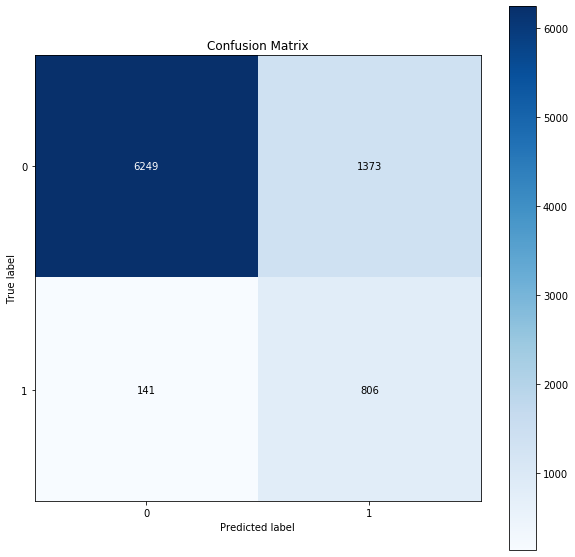

In [110]:
plot_confusion_matrix(y_test, test_preds1, figsize=[10,10])
b, t = plt.ylim()
plt.ylim(b+.5,t-.5)
plt.show()

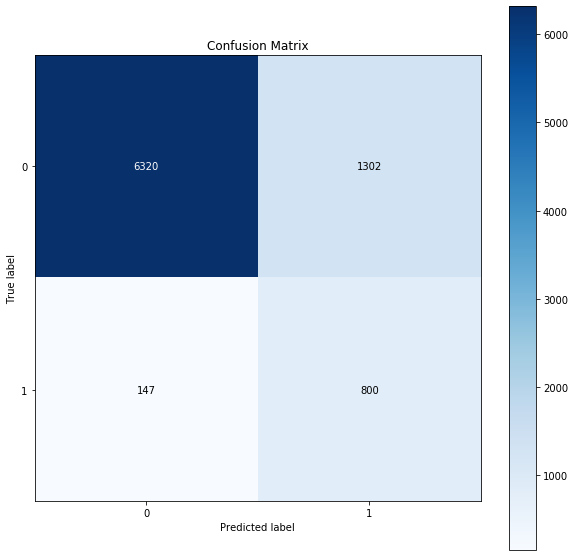

In [111]:
plot_confusion_matrix(y_test, test_preds2, figsize=[10,10])
b, t = plt.ylim()
plt.ylim(b+.5,t-.5)
plt.show()

Using SMOTE method, we were able to slightly improve on our F-1 Score and accuracy.

### ROC and AUC

In [115]:
def ROC_plot(clf_name, y_test, y_proba):
    '''
    Plots side by side ROC curves for train and test sets

    Args:
        clf_name: {string} name of estimator for display
        y_test: array-like of shape (m_samples,) test target values
        y_test_score: positive class probability predictions of test values

    Returns:
        None
    '''
    sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    print('AUC: {}'.format(auc(fpr, tpr)))
    # Calculate best threshold using Youden's J statistic
    J_score = tpr - fpr
    ix = np.argmax(J_score)
    best_t = round(thresholds[ix],3)

    # Plot ROC side by side
    plt.figure(figsize = (10,10))
    
    # Plot ROC curve for train set
    plt.plot(fpr, tpr, color='darkorange', lw=2, label= clf_name)
    # Add point for best threshold
    plt.scatter(fpr[ix], tpr[ix], marker='o', 
                zorder = 3, label=f'Best Threshold = {best_t:.2f}')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    # for add no skill line, and ax labels
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title(f'ROC Curve - \n AUC = {round(auc(fpr, tpr),2)}')
    plt.show()    
    return None

In [116]:
X_train_resampled_df=pd.DataFrame(X_train_resampled,columns=X_test.columns)

In [117]:
logreg = LogisticRegression(fit_intercept = True, C = 1e17, 
                            random_state = 42, class_weight= 'balanced')
y_pred = logreg.fit(X_train_resampled_df, y_train_resampled).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.9121669418570209


AUC: 0.9121669418570209


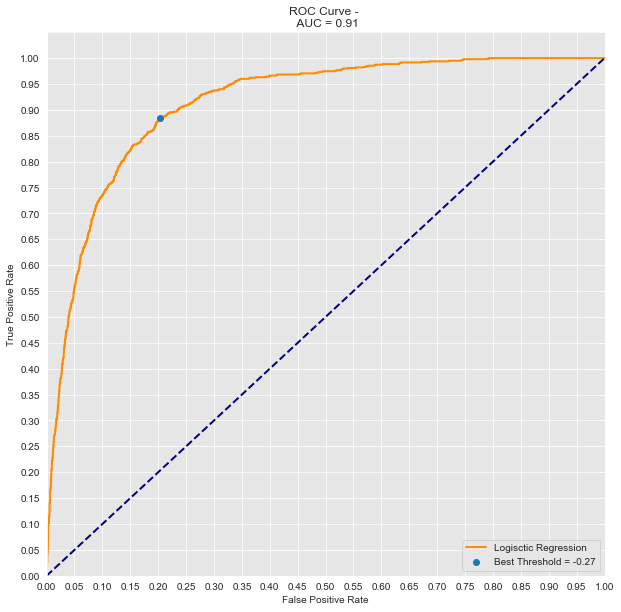

In [118]:
ROC_plot("Logisctic Regression", y_test, y_pred)

### Classifiers

In [119]:
clf_dict = {
    'Logistic Regression': LogisticRegression(random_state = 42),
    'K-Nearest Neighbours': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state = 42),
    'Naive Bayes': GaussianNB(),
    'Support Vector Classification': SVC(random_state = 42, probability = True),
    'Random Forest': RandomForestClassifier(random_state = 42),
    'AdaBoost': AdaBoostClassifier(random_state = 42),
    'Gradient Boosting': GradientBoostingClassifier(random_state = 42),
    'XGBoost' : xgb.XGBClassifier()
}

In [120]:
def clf_comparison(X_train, X_test, y_train, y_test, clf_dict):
    '''
    Fits a dictionary of classifiers, makes predictions, plots ROC, returns metrics
    
    Args:
        X_train: {array-like, sparse matrix} of shape (n_samples, n_features) train input values
        X_test: {array-like, sparse matrix} of shape (m_samples, m_features) test input values
        y_train: array-like of shape (n_samples,) train target values
        y_test: array-like of shape (m_samples,) test target values
        clf_dict: dictionary with key name of classifier and value classifier instance
        
    Returns:
        Results dataframe
    '''
    times = []
    auc_scores = []
    acc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    roc_data = []

    # Loop through dictionary items
    for key, clf in clf_dict.items():
        start_time = time.clock()

        # Fit classifier
        clf_fitted = clf.fit(X_train, y_train)
        
        # Get Predictions
        preds = clf_fitted.predict(X_test)
                
        #Get accuracy scores
        acc = accuracy_score(y_test, preds)
        acc_scores.append(round(acc,2))

        #Get F1 Scores
        f1 = f1_score(y_test, preds)
        f1_scores.append(round(f1,2))

        # Get Precision Scores
        precision = precision_score(y_test, preds)
        precision_scores.append(round(precision,2))

        # Get Recall Scores
        recall = recall_score(y_test, preds)
        recall_scores.append(round(recall,2))

        # Get Probability Predictions
        y_hat = clf_fitted.predict_proba(X_test)
        proba = y_hat[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, proba)
        roc_data.append([fpr, tpr, thresholds])

        #Get AUC scores
        auc_score = auc(fpr, tpr)
        auc_scores.append(round(auc_score,2))
        
        end_time = time.clock()
        time_elapsed = end_time - start_time
        times.append(round(time_elapsed,2))

        print(f'trained {key} in {round(time_elapsed,2)}')

    # Create results dataframe
    results = pd.DataFrame({'Model': list(clf_dict.keys()), 
                            'Time': times,
                            'Accuracy': acc_scores,
                            'F1-Score': f1_scores,
                            'Precision' : precision_scores,
                            'Recall': recall_scores,
                            'AUC': auc_scores
                            })

    # Plot side by side ROC curve
    plt.figure(figsize=[10,10])

    for i in range(len(roc_data)):
        plt.plot(roc_data[i][0], roc_data[i][1], lw=4, \
                 label= f'{list(clf_dict.keys())[i]}')


    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('Receiver operating characteristic (ROC) Curve')
    value = input("Title of the Graph?")
    plt.savefig(value, dpi=300, bbox_inches='tight')
    plt.show()
    
    return results

trained Logistic Regression in 0.84
trained K-Nearest Neighbours in 38.6
trained Decision Tree in 0.7
trained Naive Bayes in 0.1
trained Support Vector Classification in 567.21
trained Random Forest in 7.24
trained AdaBoost in 3.15
trained Gradient Boosting in 11.05
trained XGBoost in 12.64
Title of the Graph?Model Comparison


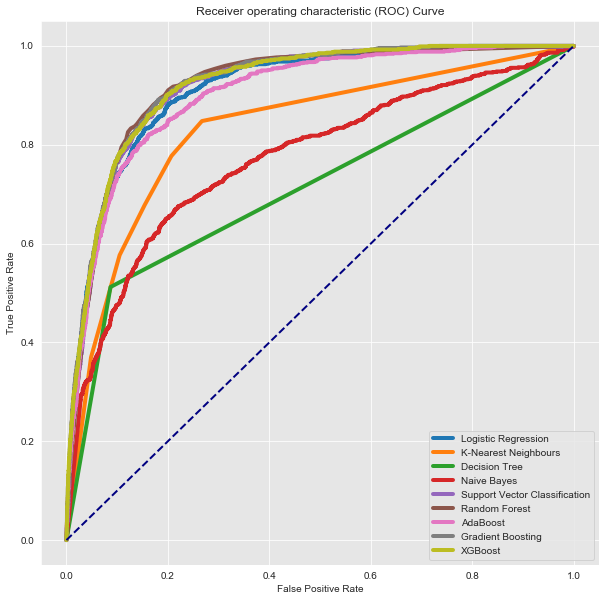

,Model,Time,Accuracy,F1-Score,Precision,Recall,AUC
0,Logistic Regression,0.84,0.83,0.52,0.38,0.84,0.91
1,K-Nearest Neighbours,38.60,0.83,0.46,0.35,0.68,0.83
2,Decision Tree,0.70,0.87,0.46,0.42,0.51,0.71
3,Naive Bayes,0.10,0.84,0.42,0.35,0.51,0.77
4,Support Vector Classification,567.21,0.88,0.59,0.48,0.77,0.92
5,Random Forest,7.24,0.90,0.54,0.58,0.50,0.92
6,AdaBoost,3.15,0.88,0.57,0.47,0.75,0.90
7,Gradient Boosting,11.05,0.89,0.60,0.49,0.76,0.92
8,XGBoost,12.64,0.89,0.60,0.49,0.77,0.92


In [121]:
clf_comparison(X_train_resampled_df, X_test, y_train_resampled, y_test, clf_dict)

Though Support Vector Classification provides the highest AUC, it is too costly. I will remove it since other models can perform just as good as the Support Vector Classification.

In [122]:
clf_dict.pop('Support Vector Classification')

SVC(probability=True, random_state=42)

### Tuning

In [123]:
RF_params = {
    'clf__max_depth': [4, 5, 6, 10, 15],
    'clf__criterion': ['gini', 'entropy'],
    'clf__n_estimators': [100, 200, 300],
    'clf__min_samples_split': [3, 5, 10],
    'clf__min_samples_leaf': [3,4,6]
}

DT_params = {
    'clf__max_depth': [5, 25, 50],
    'clf__criterion': ['gini', 'entropy'],
    'clf__min_samples_split': [3, 5, 10],
}

LR_params = {
    'clf__solver': ['liblinear'],
    'clf__C': [0.1, 1],
}

KNN_params = {
    'clf__n_neighbors': [3, 5, 11, 15],
    'clf__weights': ['uniform', 'distance'],
    'clf__p': [1, 5]
}

AB_params = {
    'clf__n_estimators' : [20, 50, 100, 200],
    'clf__learning_rate' : [0.5, 1, 1.5]
}


GB_params = {
    'clf__n_estimators' : [20, 50, 100, 200],
    'clf__max_depth' : [3, 5, 10, 15],
    'clf__min_samples_split' : [2, 3, 5]
}

XGB_params = {
    'clf__n_estimators': [20, 50, 100, 200],
    'clf__max_depth': [3, 5, 10, 15],
    'clf__min_child_weight': [2, 3, 5]
}

In [124]:
# Create new empty dictionary
tuning_clf_dict = {}

for k,v in clf_dict.items():
    tuning_clf_dict[k] = {}
    # Add clfs
    tuning_clf_dict[k]['clf'] = v
        
# Add Pipeline to nested dictionary
for k in tuning_clf_dict.keys():
    tuning_clf_dict[k]['pipeline'] = \
        Pipeline([('clf', tuning_clf_dict[k]['clf'])])
    
# Add param grid to nested dictionary

# Add key param_grid and default empty dictionary value
for k in tuning_clf_dict.keys():
    tuning_clf_dict[k]['param_grid'] = {}

# Reassign parameter grid to parametric classifiers
tuning_clf_dict['Logistic Regression']['param_grid'] = LR_params
tuning_clf_dict['Decision Tree']['param_grid'] = DT_params
tuning_clf_dict['Random Forest']['param_grid'] = RF_params
tuning_clf_dict['K-Nearest Neighbours']['param_grid'] = KNN_params
tuning_clf_dict['AdaBoost']['param_grid'] = AB_params
tuning_clf_dict['Gradient Boosting']['param_grid'] = GB_params
tuning_clf_dict['XGBoost']['param_grid'] = XGB_params   

# Add RandomizedSearchCV to nested dictionary
cv = 3
scoring = 'recall'

for k in tuning_clf_dict.keys():
    tuning_clf_dict[k]['rscv'] = RandomizedSearchCV(estimator = tuning_clf_dict[k]['pipeline'], 
                                        param_distributions = tuning_clf_dict[k]['param_grid'],
                                        scoring = scoring,
                                        cv = cv)
    
# Create new dictionary with just clf names and randomizedsearch object
# Allows it to be passed to existing batch_clf function

rscv_dict = {}

for k in tuning_clf_dict.keys():
    rscv_dict[k] = tuning_clf_dict[k]['rscv']

trained Logistic Regression in 2.2
trained K-Nearest Neighbours in 1238.41
trained Decision Tree in 8.34
trained Naive Bayes in 0.27
trained Random Forest in 149.35
trained AdaBoost in 124.3
trained Gradient Boosting in 459.86
trained XGBoost in 416.09
Title of the Graph?Tuned Model Comparison


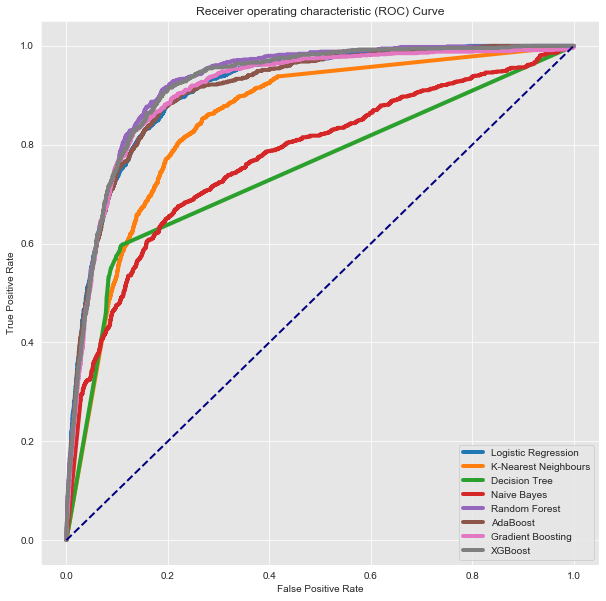

,Model,Time,Accuracy,F1-Score,Precision,Recall,AUC
0,Logistic Regression,2.20,0.83,0.52,0.38,0.84,0.91
1,K-Nearest Neighbours,1238.41,0.77,0.44,0.30,0.81,0.85
2,Decision Tree,8.34,0.87,0.49,0.42,0.58,0.75
3,Naive Bayes,0.27,0.84,0.42,0.35,0.51,0.77
4,Random Forest,149.35,0.89,0.59,0.50,0.71,0.92
5,AdaBoost,124.30,0.89,0.59,0.50,0.70,0.91
6,Gradient Boosting,459.86,0.90,0.57,0.56,0.59,0.91
7,XGBoost,416.09,0.90,0.60,0.52,0.69,0.92


In [125]:
clf_comparison(X_train_resampled_df, X_test, y_train_resampled, y_test, rscv_dict)

Based on above result, Random Forest Method has the highest F-1 Score and AUC with decent accuracy and recall rate. Not only that, it is also not so costly when running the model. Though Ada Boost and XGBoost also have great result, Random Forest seems to be most efficient.

### Random Forest Tuning

In [126]:
ran_forest = RandomForestClassifier(random_state = 42)

# Define parameter grid
RF_params = {
    'max_depth': [5, 6, 10, 20],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 300],
    'min_samples_split': [3, 5, 10],
    'min_samples_leaf': [3,4,6]
}

# Set cv to 5
cv = 5

# Define GridSearch
gs_ran_forest = GridSearchCV(estimator = ran_forest, 
                          param_grid = RF_params,
                          scoring = scoring,
                          cv = cv)

In [127]:
# Fit classifier
gs_ran_forest.fit(X_train_resampled_df, y_train_resampled)

gs_ran_forest.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 300}

In [128]:
# Get Predictions
preds = gs_ran_forest.predict(X_test)

# Get Probabilities
proba = gs_ran_forest.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7622
           1       0.54      0.66      0.59       947

    accuracy                           0.90      8569
   macro avg       0.75      0.79      0.77      8569
weighted avg       0.91      0.90      0.90      8569



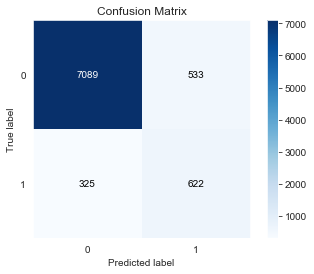

In [129]:
plot_confusion_matrix(y_test, preds)
b, t = plt.ylim()
plt.ylim(b+.5,t-.5)
plt.show()

AUC: 0.9260715590976712


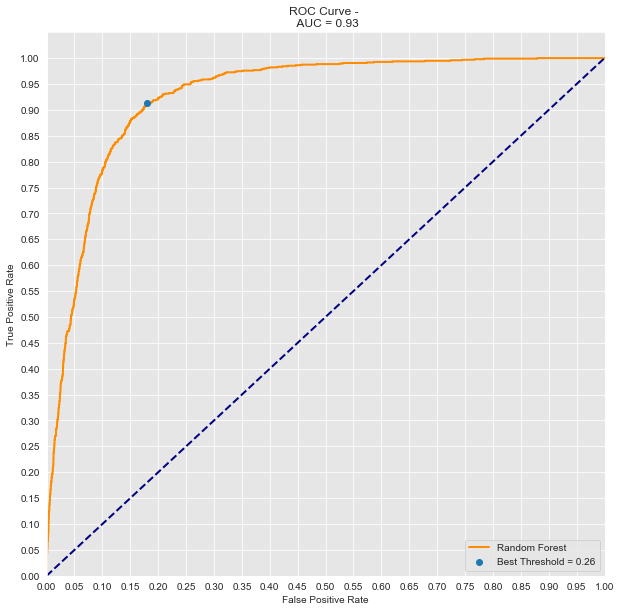

In [130]:
ROC_plot("Random Forest", y_test, proba)

## Data Interpreting - Visualization

### Interpretation

Let us first find the best parameter setting.

In [131]:
gs_ran_forest.best_estimator_.feature_importances_

array([0.03756425, 0.04005073, 0.02368643, 0.02660768, 0.33892348,
       0.04504869, 0.00902049, 0.01322792, 0.00316651, 0.00199479,
       0.00906727, 0.0021814 , 0.0024989 , 0.00577273, 0.00547968,
       0.00851597, 0.0029376 , 0.005846  , 0.01765849, 0.01196299,
       0.00872875, 0.00708978, 0.00824501, 0.00083993, 0.00083884,
       0.03447406, 0.03255412, 0.01442951, 0.01382828, 0.02633043,
       0.01462799, 0.00182019, 0.01035601, 0.00646826, 0.0122511 ,
       0.0093002 , 0.01544782, 0.0278585 , 0.00888346, 0.01736094,
       0.00735728, 0.00881083, 0.00394264, 0.04622282, 0.01409757,
       0.01211058, 0.01176389, 0.01274921])

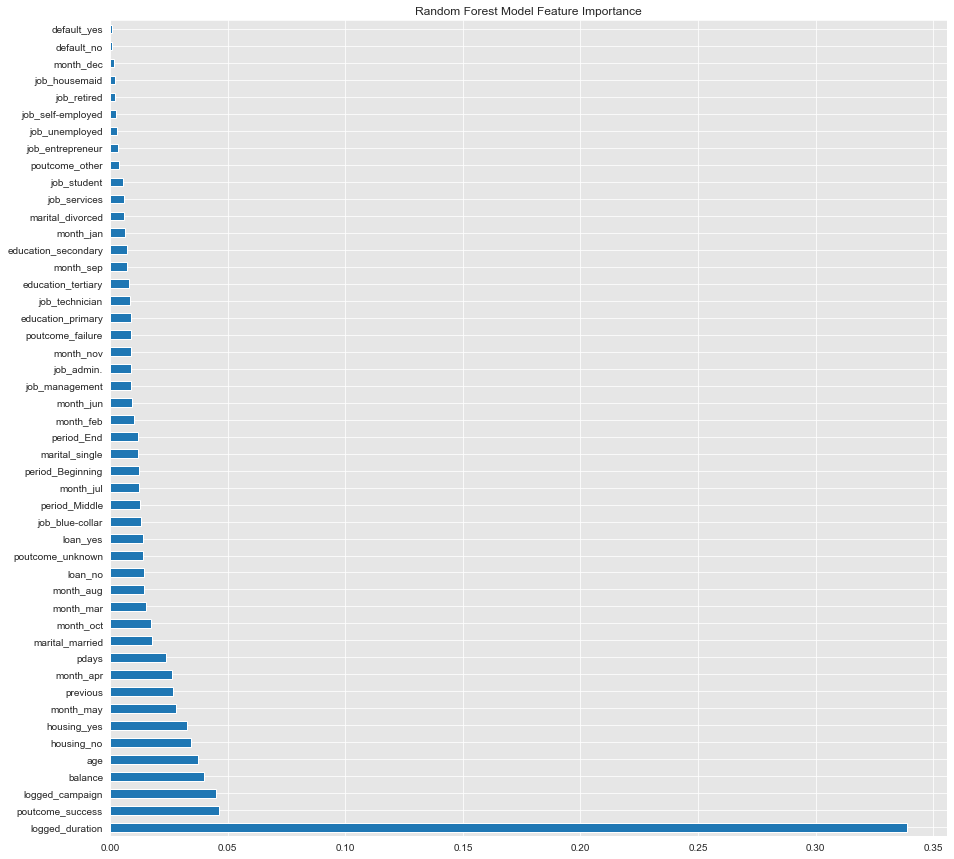

In [132]:
# Create Pandas series with feature importances 
feats = pd.Series(gs_ran_forest.best_estimator_.feature_importances_, index = X_train_resampled_df.columns)
# Sort values
feats = feats.sort_values(ascending=False)
# Drop null values
feats = feats[feats != 0]
# Plot bar plot
feats.plot(kind = 'barh', figsize = (15,15))
plt.title('Random Forest Model Feature Importance')
plt.show()

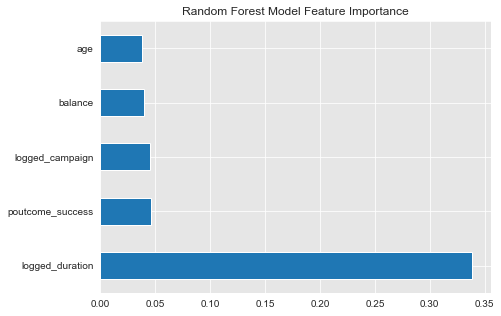

In [133]:
# Plot top 5 for presentation/ README
feats[:5].plot(kind = 'barh', figsize = (7,5))
plt.title('Random Forest Model Feature Importance')
plt.savefig("Random Forest Model 5 Most Important Features",dpi=300, bbox_inches='tight')
plt.show()

5 the most important features based on Random Forest Model are following: <br>
1. duration: how long did the contact lasted (out competes any other features)
2. poutcome_success: the outcome of the previous marketing campagin - Success
3. campaign: number of contacts performed during this campaign
4. balance: the average yearly balance
5. age: age of the client

###  Duration Visual

In [134]:
dur_mean = cleaned_df.logged_duration.mean()
above_mean_df = cleaned_df[cleaned_df.logged_duration>dur_mean]
below_mean_df = cleaned_df[cleaned_df.logged_duration<dur_mean]

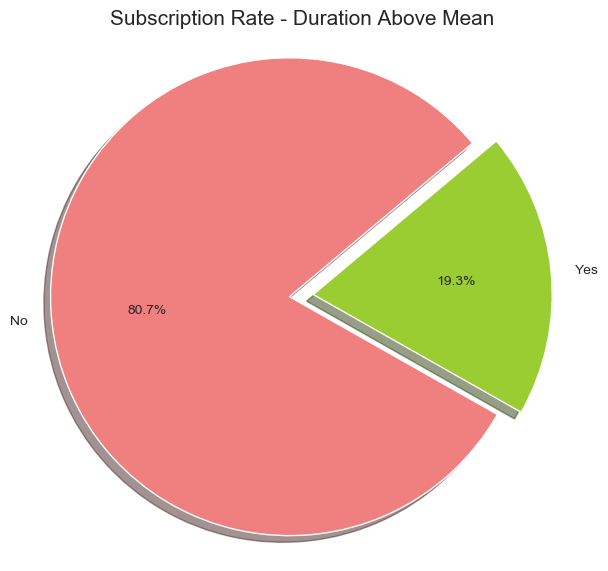

In [135]:
colors = ['lightcoral', 'yellowgreen']
labels = ['No', 'Yes']
explode = (0, 0.1)
plt.figure(figsize=[7,7], dpi=100)
plt.pie(above_mean_df.y.value_counts(),
        labels=labels,
        explode=explode, colors=colors,
        shadow=True, startangle=40, autopct='%1.1f%%')
plt.title("Subscription Rate - Duration Above Mean", fontdict={'fontsize':15})
plt.axis('equal')
plt.savefig("Duration above Mean", dpi=200)
plt.show()

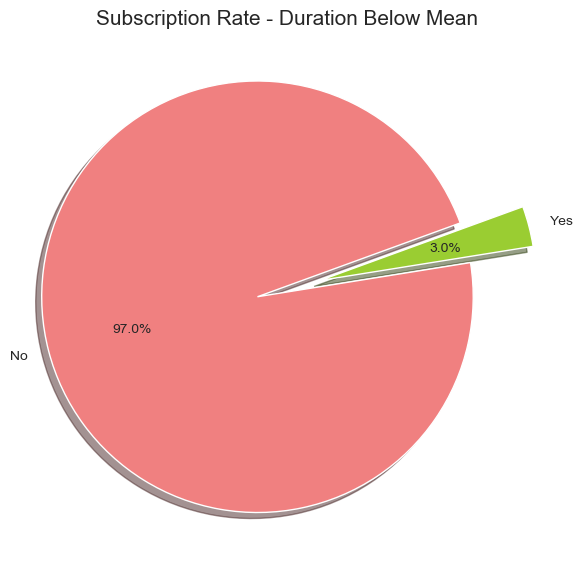

In [136]:
colors = ['lightcoral', 'yellowgreen']
labels = ['No', 'Yes']
explode = (0, 0.3)
plt.figure(figsize=[7,7], dpi=100)
plt.pie(below_mean_df.y.value_counts(),
        labels=labels,
        explode=explode, colors=colors,
        shadow=True, startangle=20, autopct='%1.1f%%')
plt.title("Subscription Rate - Duration Below Mean", fontdict={'fontsize':15})
plt.axis('equal')
plt.savefig("Duration Below Mean", dpi=200)
plt.show()

### Balance Visual - Future Work

IQR for Balance was in the range from -1,935 to 3,417. To visualize the data I will further break down the balance range for every $500

In [137]:
dmap = {}

bal_neg = list(range(-2000,0))
bal_500 = list(range(0,501))
bal_1000 = list(range(501,1001))
bal_1500 = list(range(1001,1501))
bal_2000 = list(range(1501,2001))
bal_2500 = list(range(2001,2501))
bal_3000 = list(range(2501,3001))
bal_3500 = list(range(3001,3501))

for i in bal_neg: dmap[i]="Negative"
for i in bal_500: dmap[i]="0-500"
for i in bal_1000: dmap[i]="501-1000"
for i in bal_1500: dmap[i]="1001-1500"
for i in bal_2000: dmap[i]="1501-2000"
for i in bal_2500: dmap[i]="2001-2500"
for i in bal_3000: dmap[i]="2501-3000"
for i in bal_3500: dmap[i]="3001-3500"

bal = []
for i in cleaned_df.balance:
    bal.append(dmap.get(i))
bal[:5]

['2501-3000', '3001-3500', '0-500', '0-500', '501-1000']

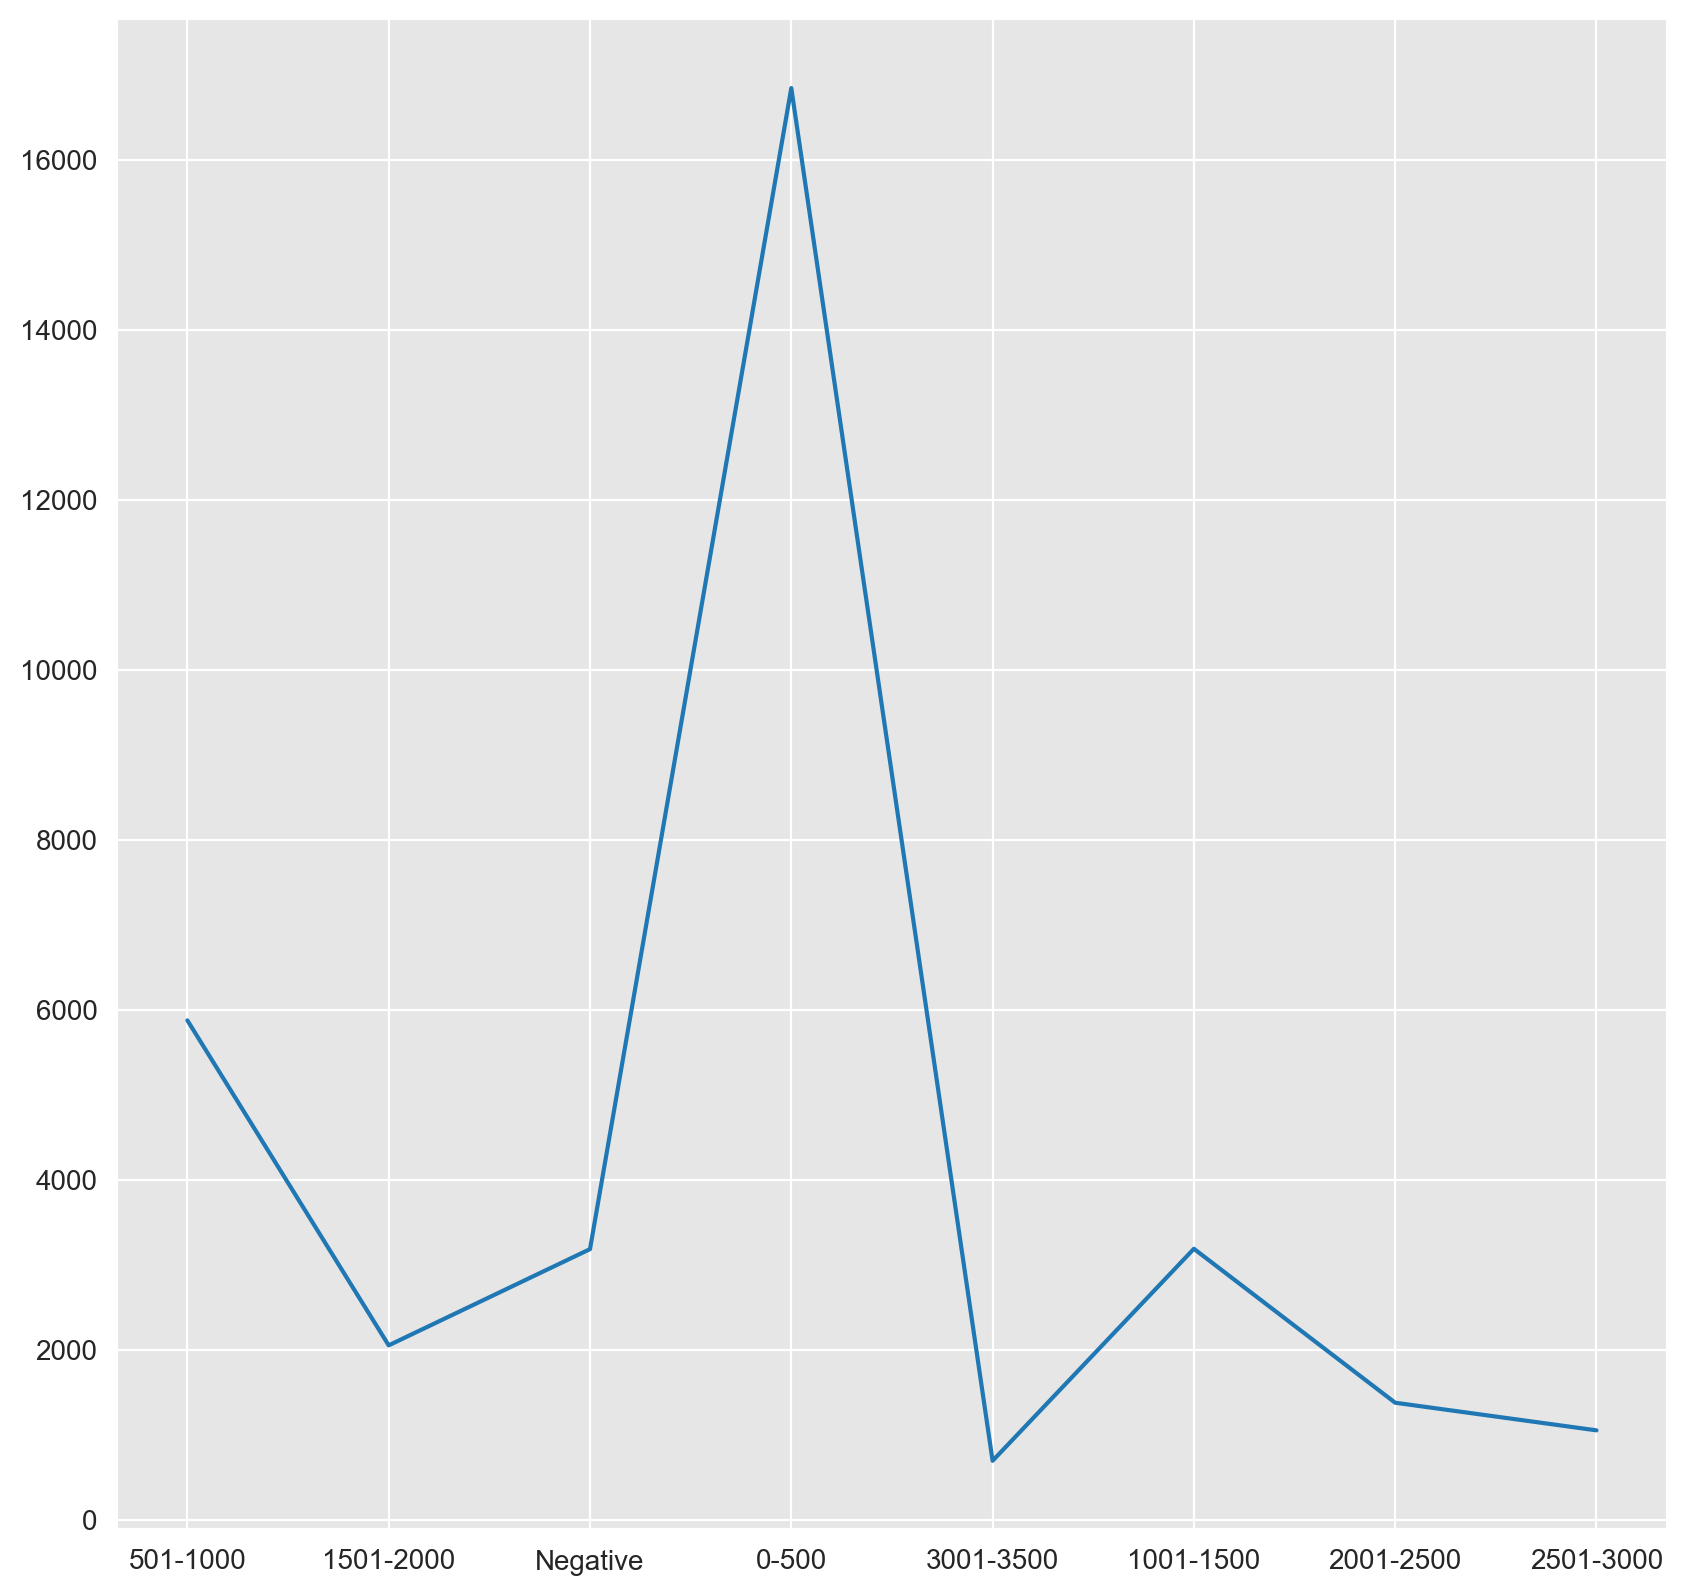

In [139]:
bal_df = cleaned_df.loc[:,['balance','y']]
bal_df['Bal_Range'] = bal
order =["Negative", "0-500", "501-1000", "1001-1500", "1501-2000",
       "2001-2500", "2501-3000", "3001-3500", "above 3500"]
yes_bal_range=bal_df[bal_df.y=='yes']
no_bal_range=bal_df[bal_df.y=='no']
Bal_range = bal_df.Bal_Range.value_counts(sort=False)
x = Bal_range.index
y = Bal_range.values
plt.figure(figsize=[10,10], dpi=200)
plt.plot(x,y);
# sns.catplot()
# sns.catplot(x="Bal_Range", y="balance", hue="y",
#             palette={"yes": "g", "no": "orange"},
#             markers=["^", "o"], linestyles=["-", "--"],
#             kind="point", data=cleaned_df)
# plt.title("Housing vs Balance")
# plt.savefig("Balance Visual", dpi=300, bbox_inches='tight')
# plt.show()

In [ ]:
cleaned_df[]

<Figure size 3000x3000 with 0 Axes>

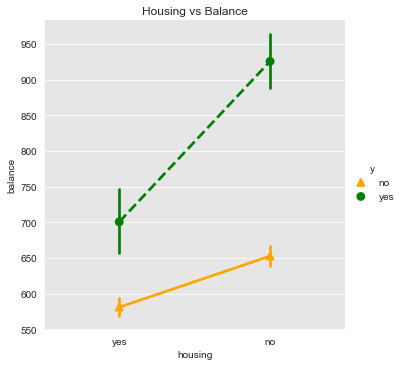

In [140]:
plt.figure(figsize=[15,15], dpi=200)
sns.catplot(x="housing", y="balance", hue="y",
            palette={"yes": "g", "no": "orange"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=cleaned_df)
plt.title("Housing vs Balance")
plt.savefig("Balance Visual", dpi=300, bbox_inches='tight')
plt.show()

### Campaign Visual

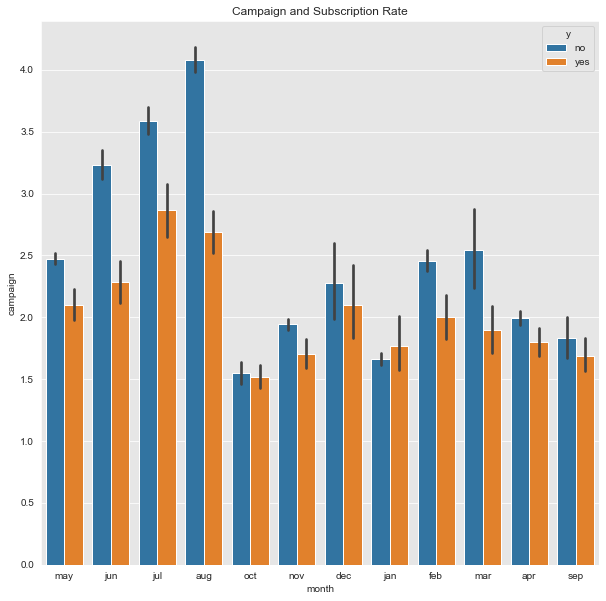

In [141]:
plt.figure(figsize=[10,10])
sns.barplot(x='month', y="campaign", hue='y', data=full_df)
plt.title("Campaign and Subscription Rate")
plt.savefig("Campaign Visual", dpi=300, bbox_inches='tight')
plt.show();

### Test Set Predictions  - Using Pipeline

Prepare class and steps for the pipeline.

In [142]:
class NumPreprocess (BaseEstimator, TransformerMixin):
        
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Get data of numerical type
        dmap = {}
        beginning = list(range(1,11))
        middle = list(range(11,21))
        ending = list(range(21,32))
        for i in beginning: dmap[i]="Beginning"
        for i in middle: dmap[i]="Middle"
        for i in ending: dmap[i]="End"
        per = []
        for i in X.day:
            per.append(dmap.get(i))
        X["period"] = per
        X = X.drop(columns=['day'])
        transformer = FunctionTransformer(np.log1p, validate=True)
        X.duration.loc[X.duration==0]=.00001
        X['logged_duration'] = np.log(X['duration'])
        X['logged_campaign'] = np.log(X['campaign'])
        X= X.drop(columns=['campaign', 'duration', 'contact'])

        
        X_num = X.select_dtypes(include = np.number).reset_index(drop = True)
        
         # Get data of categorical type
        X_cat = X.select_dtypes(include = object).reset_index(drop = True)
        
        # Scale using standard scaler
        ss = StandardScaler()
        
        # Fit and Transform Data
        X_num_scaled = ss.fit_transform(X_num)
        
        # Recreate DataFrame
        X_num_scaled = pd.DataFrame(X_num_scaled, columns = X_num.columns)
        
        # Combine X_num_scaled and categorical feats using pd.concat
        X = pd.concat([X_num_scaled, X_cat], axis = 1)
        return X 

In [143]:
cat_attribs = ['job', 'marital','education', 'default', 'housing', 'loan', 'month', \
               'poutcome', 'period']
cat_process = ColumnTransformer([
    ('cat', OneHotEncoder(), cat_attribs)],
    remainder = 'passthrough')

Define pipeline.

In [144]:
pipe = Pipeline([('num_preprocess', NumPreprocess()),
                 ('cat_preprocess', cat_process),
                 ('smote', smote),
                 ('clf', RandomForestClassifier(criterion = 'gini',
                                               max_depth = 20,
                                               min_samples_leaf = 3,
                                               min_samples_split = 3,
                                               n_estimators =  300))])

Define X and y columns

In [145]:
X = df.drop(columns=['y'])
y = df.y
y = y.map(lambda x: 1 if x == 'yes' else 0)

test_set_X = test_set.drop(columns=['y'])
test_set_y = test_set.y
test_set_y = test_set_y.map(lambda x: 1 if x == 'yes' else 0)

Fit, predict and get report.

In [146]:
pipe.fit(X, y)
test_set_pred = pipe.predict(test_set_X)
test_set_proba = pipe.predict_proba(test_set_X)[:,1]
print(classification_report(test_set_y, test_set_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      4415
           1       0.45      0.78      0.57       585

    accuracy                           0.86      5000
   macro avg       0.71      0.83      0.74      5000
weighted avg       0.91      0.86      0.88      5000



Visualize the confusion matrix.

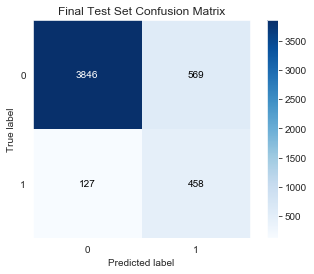

In [147]:
plot_confusion_matrix(test_set_y, test_set_pred)
plt.title('Final Test Set Confusion Matrix')
b, t = plt.ylim()
plt.ylim(b+.5,t-.5)
plt.show()

AUC: 0.9122970448451763


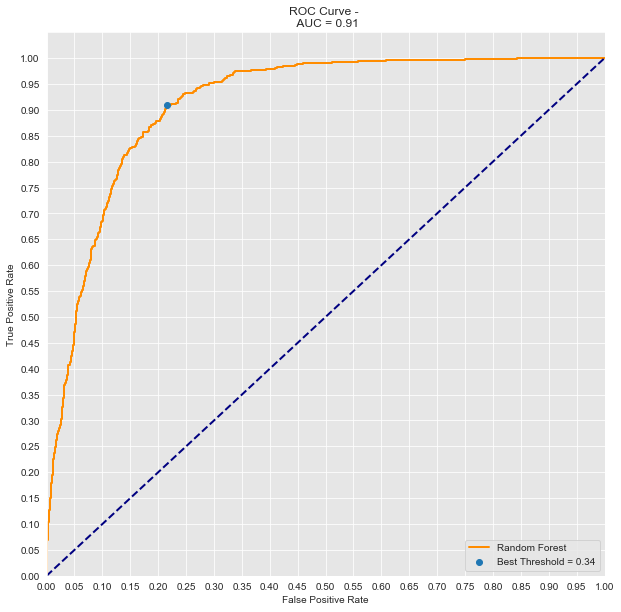

In [148]:
ROC_plot('Random Forest',test_set_y, test_set_proba)

### Test Calls - 1000 most likely to subscribe 

The bank has a limit of 1000 calls it can make. Now is time to test our 1000 calls and see the probability of the subscription.
Note initial subscription rate was at about 11%.

In [149]:
#copy the test set df
test_set_with_proba = test_set.copy()
#add the column to the test_set
test_set_with_proba['yes_proba'] = test_set_proba

# View dataframe
test_set_with_proba.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,yes_proba
36670,30,services,single,secondary,no,-158,yes,no,cellular,12,may,426,1,370,2,failure,yes,0.404731
15067,27,management,married,tertiary,no,342,yes,no,cellular,17,jul,818,1,-1,0,unknown,no,0.742044
43008,49,technician,divorced,secondary,no,0,yes,no,cellular,11,feb,283,3,-1,0,unknown,no,0.252046
34015,30,admin.,single,secondary,no,414,no,no,cellular,30,apr,64,1,-1,0,unknown,no,0.306716
5188,47,services,married,unknown,no,4822,yes,no,unknown,21,may,154,5,-1,0,unknown,no,0.019735


We will sort the the data based on the highest probability and pick first 500 to call.

In [150]:
top_1000 = test_set_with_proba.sort_values('yes_proba', ascending = False)[:1000]
top_1000.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,yes_proba
44531,35,blue-collar,married,secondary,no,1454,yes,no,cellular,12,aug,323,1,182,4,success,yes,0.981827
41781,35,management,single,tertiary,no,2646,no,no,cellular,13,oct,221,1,182,1,success,yes,0.981376
44635,37,management,married,tertiary,no,1113,no,no,cellular,1,sep,265,2,183,2,success,yes,0.980800
44704,52,management,married,tertiary,no,2635,no,no,cellular,6,sep,313,1,108,8,success,no,0.975694
43047,23,student,single,secondary,no,1234,no,no,cellular,15,feb,379,1,91,1,success,yes,0.972302


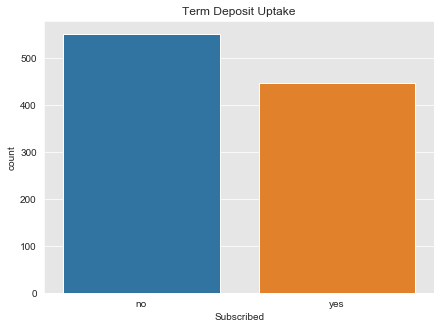

In [151]:
plt.figure(figsize = (7,5))
sns.countplot(top_1000['y'], order=['no', 'yes'])
plt.xlabel('Subscribed')
plt.title('Term Deposit Uptake')
plt.savefig('After Model.jpeg',dpi=300, bbox_inches= 'tight')
plt.show()

In [152]:
top_1000['y'].value_counts()

no     552
yes    448
Name: y, dtype: int64

The model was able to predict and classify the group of customers who will subscribe at success rate of 44.8%.

# Conclusion

Bank XYZ challenged us to select 1000 customers who are most likely to subscribe to a term deposit. Initial success rate of subscription on cold call was at 11.1%. We have adopted OSEMN method. Based on the cost, accuracy, high recall rate and F-1 score,  we concluded that Random Forest model is the best model case for this classification compared to any other models. In result, we were able to build a model with 90% accuracy and successfully predict 448 customers who subscribed which is 44.8% success rate. In comparison to cold call, that success rate is about 400% increase and it can provide much efficiency to the business. 

A summary of the key steps which led us to this result are as follows:

&emsp; 1) We gathered data relating to customers' personal profile (job, age, education etc), financial (housing loan, personal loan, default) and economic indices (consumer price index). We had around 40,000 entries on which to train our algorithm.

&emsp; 2) We cleaned the data, removed ouliers, tested multicolinearity, replaced unknown values using random distribution and kept some unknowns on purpose based on the business understanding.

&emsp; 3) We adjusted for the class imbalance by using SMOTE.

&emsp; 4) We trained the following classifiers and tuned them using RandomizedGridSearchCV: Logistic Regression, Decision Tree, K-Nearest Neighbours, Naive Bayes, Support Vector Classification, Adaboost, RandomFroestClassifier, Gradient Boosting and XGBoost. Based on our profit metric, we selected XGBoost as our best performing model. We concluded RandomForestClassifier is the model to fit based on accuracy, cost of running model, recall rate and F1 score.

&emsp; 5) We further fine tuned the paramaters of RandomForest using GridSearchCV.

&emsp; 6) We applied our final model to the test set and chose the 1000 customers with highest probability of being classified as subscribers.

<strong> The 5 features which had the highest impact on the classification are </strong>

1. duration: how long did the contact lasted (out competes any other features)
2. poutcome_success: the outcome of the previous marketing campagin - Success
3. campaign: number of contacts performed during this campaign
4. balance: the average yearly balance
5. age: age of the client 
<br>
<br>
<strong>Recommendations:</strong>

&emsp; 1) Focus on relationship building with customers. Duration of the call was the most influencing the result. Longer duration of the call tend to bring higher subscription rate.<br>
&emsp; 2) Focus on repeat customers as clients who previously subscribed to a term deposit are more likely to do so again (64%)

# Future Work

There are a number of avenues we would be keen to explore in the next phase of this project.

<strong>Data Cleaning and Scaling</strong>

&emsp; We have found some hardships during the scrubbing of the data. We've tried centralize the data log scaling and take out outliers. We have faced errors for the log scaling due to negative values which resulted chunk of data loss. We will apply alternate scaling method to reduce the data loss

<strong>Data Obtain</strong>

&emsp; For this project, we have used the data that was about 10 years old. We would like to find more recent data to find more realistic result that can be applied to most current business era.

<strong>Explore alternative marketing models</strong>

&emsp; Instead of telemarketing, consider email which would have a smaller cost associated and likely allow a larger customer base to be reached.